# Understand trained STM models

In [1]:
library('stm')

stm v1.3.4 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



In [2]:
# Load trained model
num_topics <- 10
max_iters <- 50
min_df <- 100
covariates <- 'gender+rel_type'
do_stem <- TRUE
path <- sprintf('/projects/fanfiction_gender_roles/models/hp_stm_%s_%dtopics_%dit_%dmindf.rds', covariates, num_topics, max_iters, min_df)
model <- readRDS(path)
labelTopics(model, n=10) # top words for each topic

Topic 1 Top Words:
 	 Highest Prob: look, smile, nod, turn, gave, sigh, laugh, ask, shook, took 
 	 FREX: nod, grin, smile, sigh, shrug, chuckl, shook, laugh, spoke, smirk 
 	 Lift: gratifi, pipe, wink, whoop, holler, hiccup, pout, giggl, snicker, hey 
 	 Score: look, nod, smile, sigh, shook, grin, laugh, gave, shrug, chuckl 
Topic 2 Top Words:
 	 Highest Prob: said, ask, think, repli, know, look, mean, agre, took, put 
 	 FREX: said, ask, repli, mean, suggest, agre, point, repeat, think, protest 
 	 Lift: wager, said, clarifi, neither, ask, echo, exchang, counter, either, daresay 
 	 Score: said, ask, wager, repli, think, mean, agre, shrug, suggest, mutter 
Topic 3 Top Words:
 	 Highest Prob: knew, felt, thought, found, saw, heard, rememb, watch, see, took 
 	 FREX: knew, saw, felt, heard, found, rememb, realiz, woke, thought, notic 
 	 Lift: smelt, overcam, reopen, awok, saw, woke, knew, heard, found, understood 
 	 Score: felt, knew, saw, thought, found, heard, smelt, rememb, realiz

In [3]:
# Load documents
# data <- read.csv('/data/fanfiction_gender_roles/harrypotter_ao3/complete_en_1k-50k/output/character_gender_features.csv')
data <- read.csv('/data/fanfiction_gender_roles/harrypotter_ao3/complete_en_1k-50k/output/character_relationship_features.csv')
processed <- textProcessor(data$character_features, stem=do_stem, metadata=data)
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh=min_df)
print(nrow(out$meta))
print(model$settings$dim$N)

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 14233 of 16698 terms (134015 of 5734739 tokens) due to frequency 
Removing 1674 Documents with No Words 
Your corpus now has 262633 documents, 2465 terms and 5600724 tokens.[1] 262633
[1] 262633


## Save out documents-topic proportion matrix

In [5]:
model$theta

0.05641055,0.031856272,0.06433951,0.119679897,0.06601688,0.42351853,0.032110312,0.04715552,0.08645402,0.07245851
0.21669677,0.062705329,0.10345370,0.035561360,0.03156800,0.06631406,0.244738227,0.12999578,0.04949880,0.05946797
0.15099250,0.104656977,0.12411151,0.021223168,0.01979318,0.04916968,0.283912949,0.09816421,0.11554555,0.03243028
0.12873656,0.055819380,0.03667513,0.018143953,0.06255932,0.04883275,0.491629696,0.04974627,0.05918542,0.04867151
0.32025060,0.250503345,0.04530995,0.038447990,0.04276151,0.07564658,0.049165076,0.05805209,0.09331577,0.02654709
0.24096126,0.452480848,0.04635492,0.021738191,0.02135458,0.03979923,0.034127765,0.04156357,0.07395393,0.02766572
0.14210730,0.079668625,0.09171673,0.093782712,0.07604547,0.13517810,0.052455731,0.15792995,0.11950672,0.05160866
0.04148558,0.248279285,0.23185267,0.037839732,0.09607037,0.02673232,0.098102971,0.03108429,0.06619841,0.12235437
0.13094046,0.404012912,0.03317774,0.040162843,0.03902153,0.03533876,0.021142231,0.03836938,0.17160705,0.08622709
0.17480485,0.560394294,0.01589830,0.008256733,0.04811378,0.02142900,0.046095260,0.02788005,0.07984841,0.01727932
0.07209554,0.638685760,0.02484016,0.070588997,0.02098372,0.04181839,0.016355318,0.03138565,0.05291612,0.03033035


In [6]:
install.packages('reticulate')

Installing package into ‘/usr0/home/mamille2/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [7]:
library('reticulate')
np <- import('numpy')

In [9]:
path <- sprintf('/projects/fanfiction_gender_roles/output/hp_stm_%s_%dtopics_%dit_%dmindf_doc_topic.npy', covariates, num_topics, max_iters, min_df)
fileConn <- file(path)

In [12]:
class(fileConn)

[1] "file"       "connection"

In [13]:
class(model$theta)

[1] "matrix"

In [15]:
np$save(path, model$theta)

In [17]:
# Save out order of the documents
class(out$meta$fic_id)

[1] "integer"

In [20]:
class(out$meta['fic_id'])

[1] "data.frame"

In [18]:
length(out$meta$fic_id)

[1] 262633

In [23]:
names(out$meta)

[1] "fic_id"                         "character_original"            
 [3] "character_canonical"            "character_gender"              
 [5] "character_features"             "title"                         
 [7] "author"                         "author_key"                    
 [9] "rating"                         "category"                      
[11] "fandom"                         "relationship"                  
[13] "character"                      "additional.tags"               
[15] "language"                       "published"                     
[17] "status"                         "status.date"                   
[19] "words"                          "comments"                      
[21] "kudos"                          "bookmarks"                     
[23] "hits"                           "chapter_count"                 
[25] "series"                         "seriespart"                    
[27] "seriesid"                       "summary"                       
[29] "preface_notes"                  "afterword_notes"               
[31] "character_in_relationship"      "character_in_relationship_type"

In [24]:
cols <- c('fic_id', 'character_original')
selected <- out$meta[cols]
selected

,fic_id,character_original
,<int>,<fct>
1,5888698,Remus
3,10199,Draco
4,5355224,Hermione
5,5355224,Draco
6,5355224,Ginny
7,5355224,Luna
8,5355224,Salazar
9,10838292,Remus
10,10838292,Marlene


In [25]:
path <- sprintf('/projects/fanfiction_gender_roles/output/hp_stm_%s_%dtopics_%dit_%dmindf_fic_ids_chars.csv', covariates, num_topics, max_iters, min_df)
# path <- sprintf('/projects/fanfiction_gender_roles/output/hp_stm_%s_%dtopics_%dit_%dmindf_fic_ids.txt', covariates, num_topics, max_iters, min_df)
write.csv(selected, path, row.names = FALSE)

## Show top documents for each topic

In [141]:
topdocs <- findThoughts(model, texts=out$meta$character_features,
                       topics = 5,
                       n = 4
                       )
topdocs

Warning message in findThoughts(model, texts = out$meta$character_features, topics = 5, :
“texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future.”



 Topic 5: 
 	 stops blinks 's is says asks says smoke says says gets says says looks says says says says says tries said grinned asked going 's says 's says reply throws is says says get watches emerges says pours shakes talking says says says says says says says says says go turns says pulls claps knows takes is says says says looks says says says says says emerges working says says says leans says says says tried says leaves tries gives 's goes got is looks looks says pulls emerges says says says says says says mean says laughs says says says feels says says says compiles kisses says takes tucks about see to at to supposed at daring mention about beats as sending gives kisses onto hell supermarket whisky
 	takes says know says think says 's says see says says have says studying says received tell finds says sticks says says catches is spends stops sees feels asks says opens shivering is says seen been says 're doing 're catches help come was says was says says need says says feels t

## Proportion of the corpus that belongs to each topic

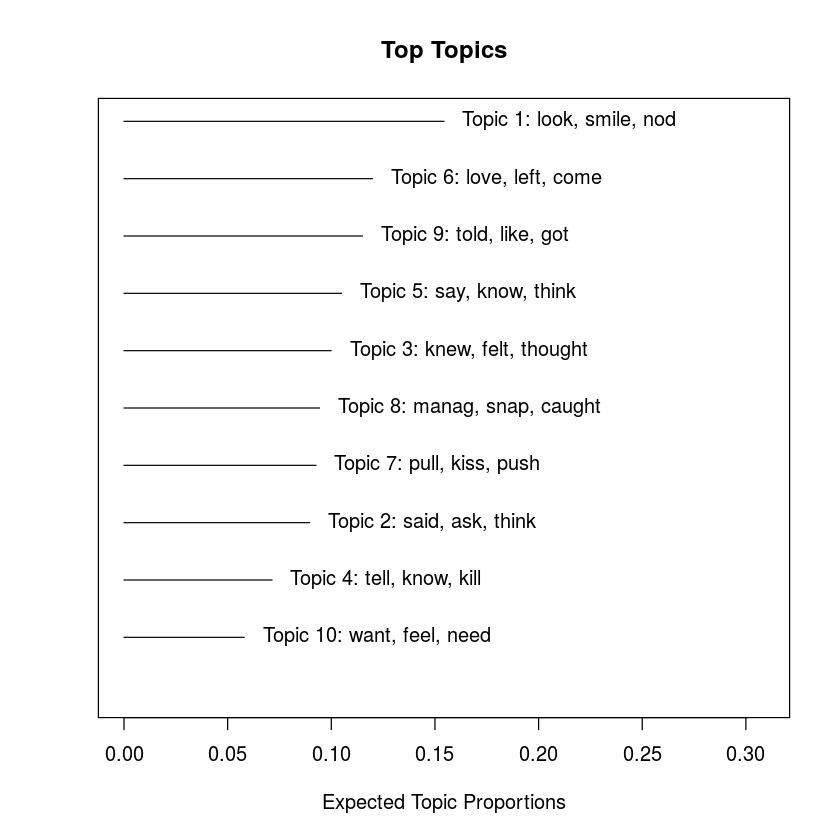

In [3]:
plot(model, type='summary')

## Relationships with metadata/topics

### Gender of characters

In [7]:
# Covariate: gender
effect <- estimateEffect(~character_gender, model, meta=out$meta, uncertainty='Global')
summary(effect)


Call:
estimateEffect(formula = ~character_gender, stmobj = model, metadata = out$meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.1484149  0.0005599 265.077   <2e-16 ***
character_gendermale -0.0065520  0.0006597  -9.932   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.1011592  0.0004853  208.45   <2e-16 ***
character_gendermale -0.0138307  0.0005897  -23.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.1000103  0.0005237 190.979  < 2e-16 ***
character_gendermale 0.0023644  0.0005565   4.249 2.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
     

In [4]:
# Covariate: gender + relationship type
effect <- estimateEffect(~character_gender + character_in_relationship_type, model, meta=out$meta, uncertainty='Global')
summary(effect)


Call:
estimateEffect(formula = ~character_gender + character_in_relationship_type, 
    stmobj = model, metadata = out$meta, uncertainty = "Global")


Topic 1:

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.1493713  0.0006254 238.841  < 2e-16
character_gendermale                   -0.0047469  0.0007000  -6.782 1.19e-11
character_in_relationship_typequeer    -0.0089633  0.0007862 -11.401  < 2e-16
character_in_relationship_typestraight -0.0025561  0.0008838  -2.892  0.00383
character_in_relationship_typeunknown  -0.0063444  0.0026053  -2.435  0.01488
                                          
(Intercept)                            ***
character_gendermale                   ***
character_in_relationship_typequeer    ***
character_in_relationship_typestraight ** 
character_in_relationship_typeunknown  *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
     

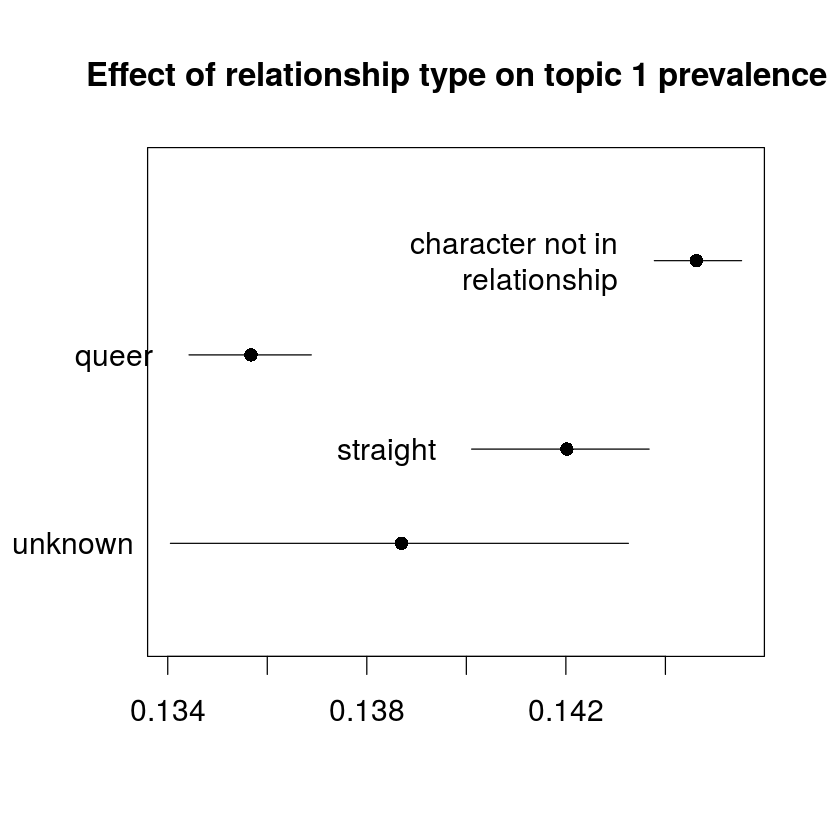

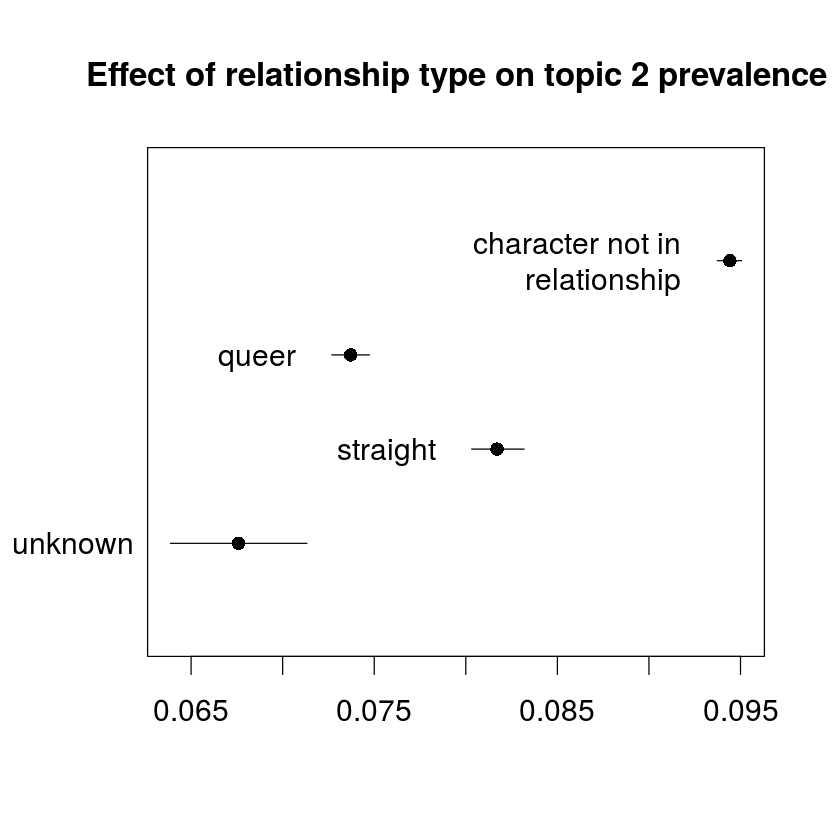

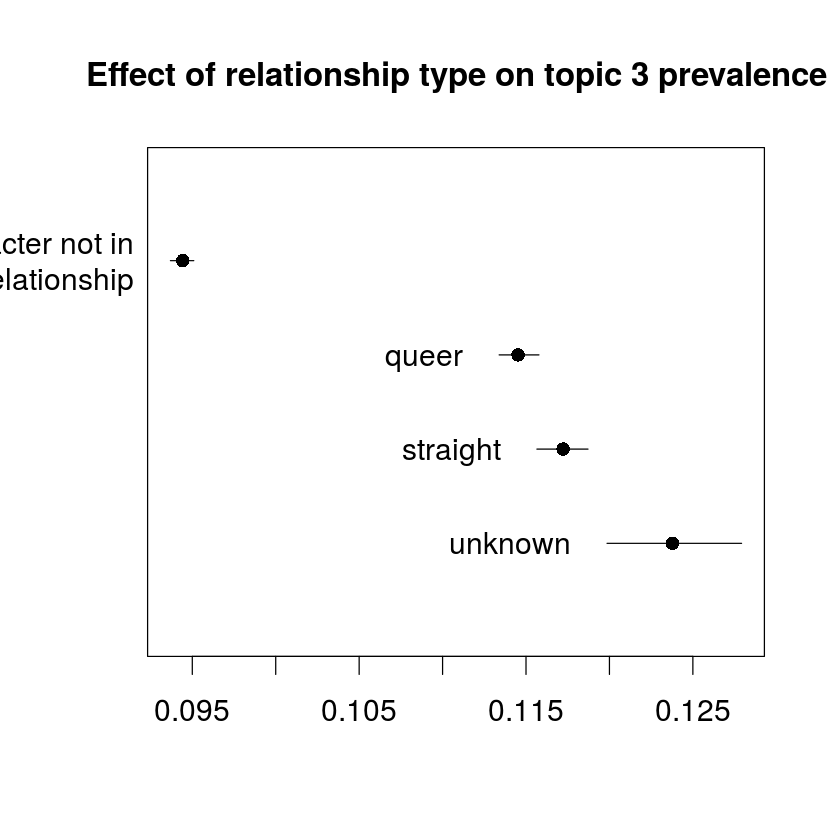

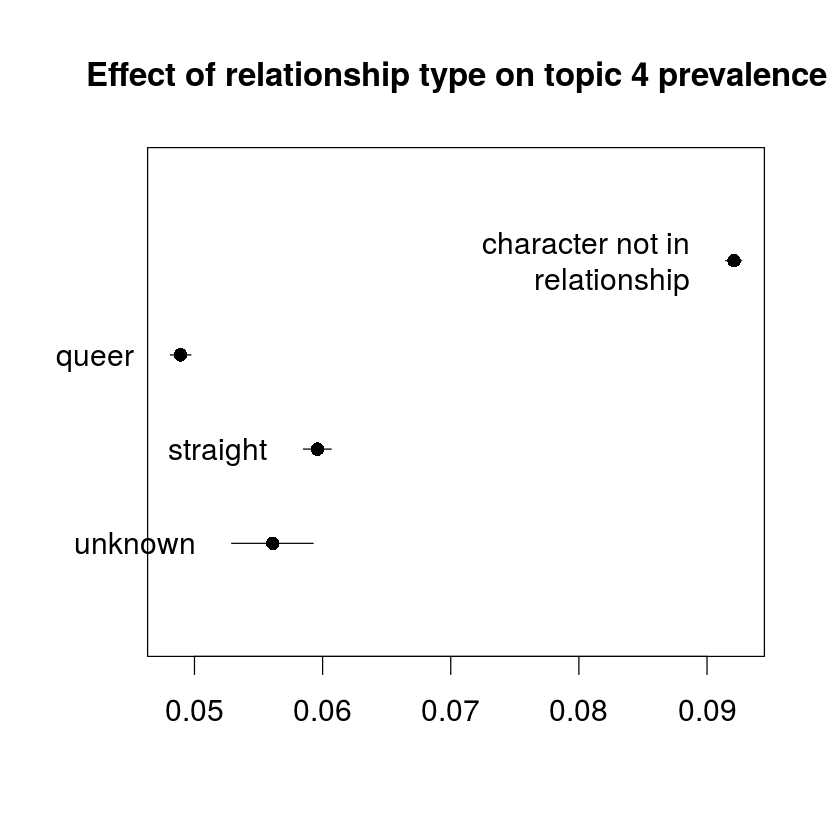

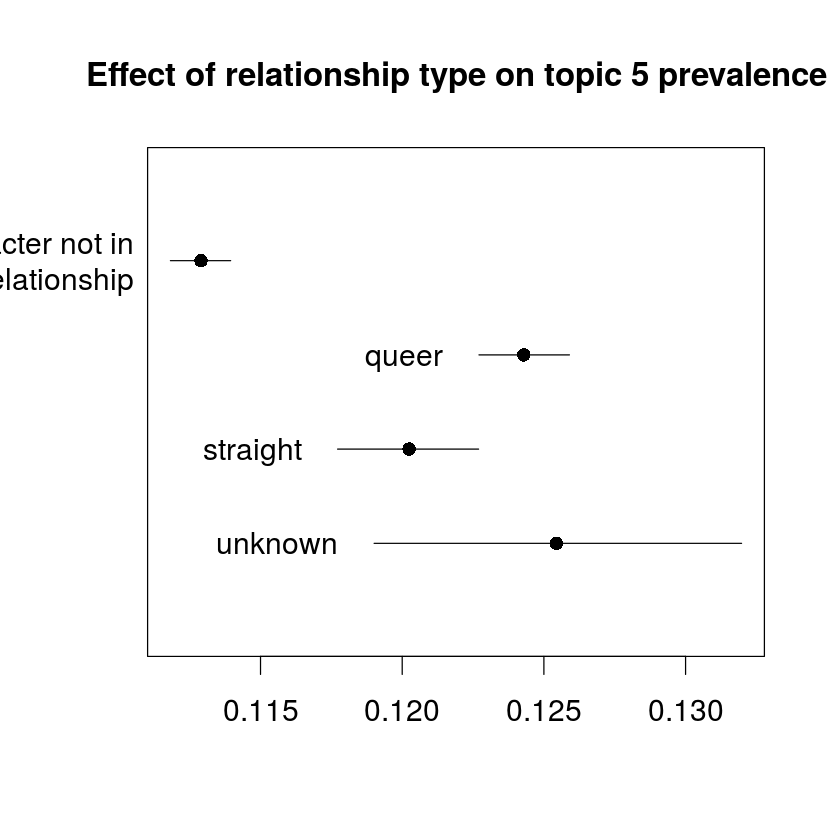

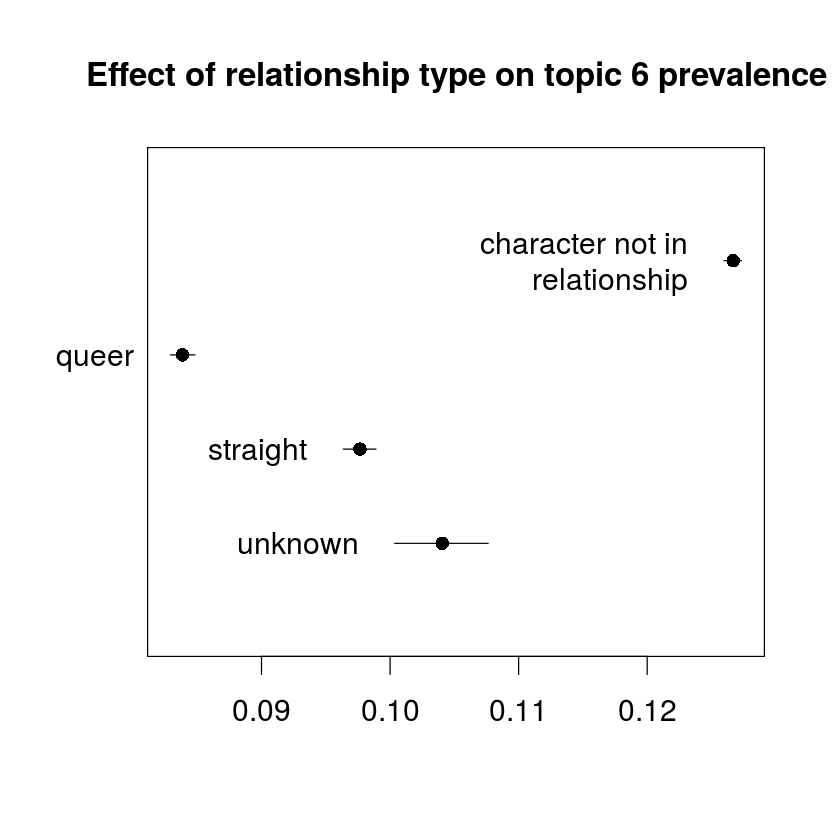

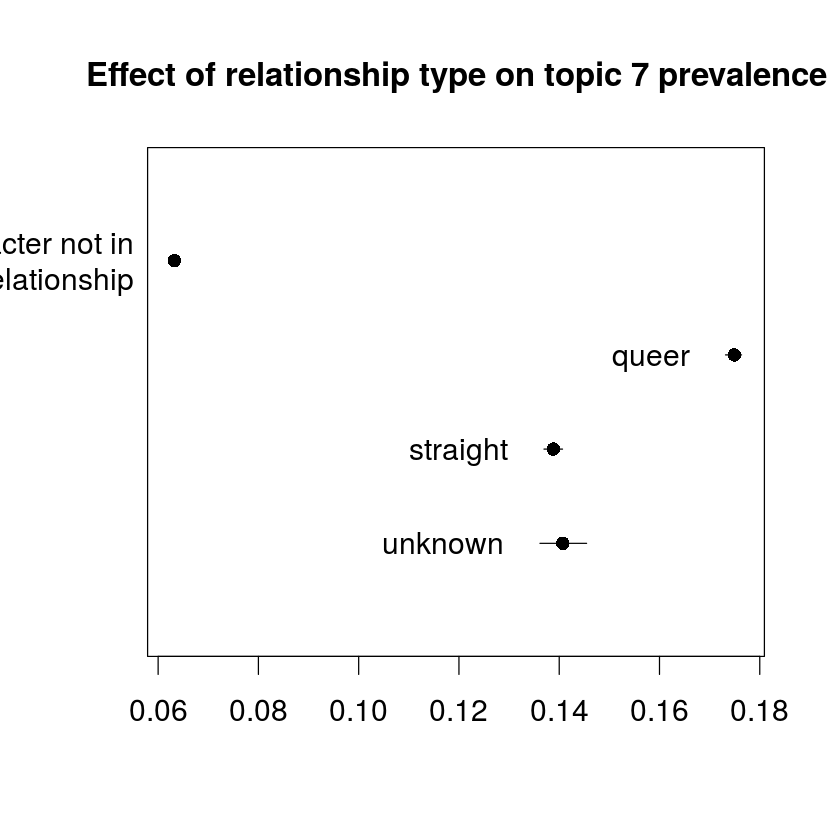

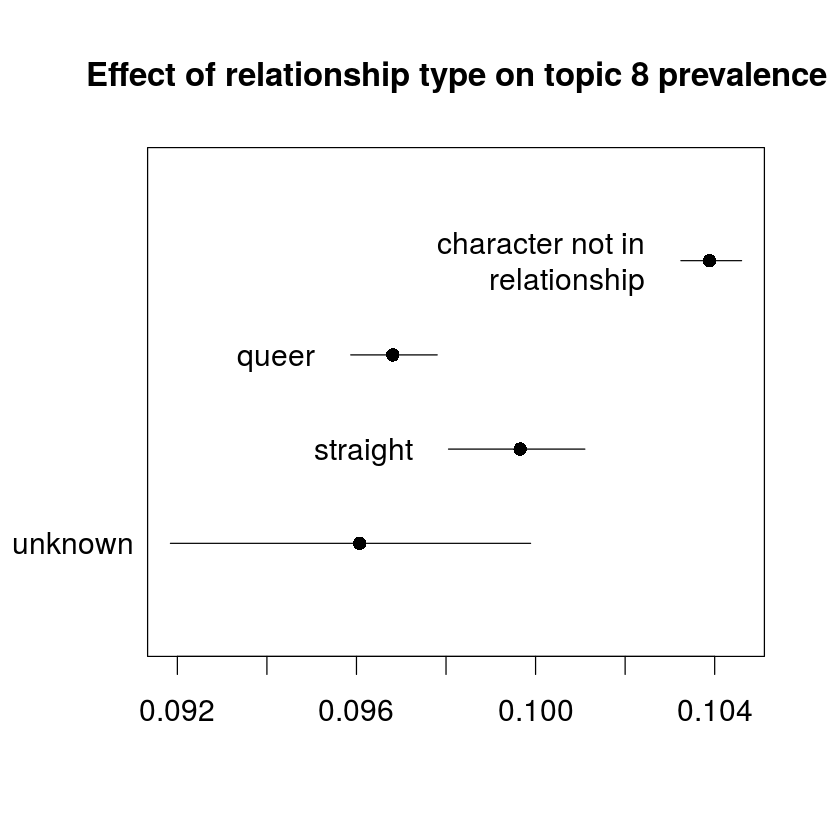

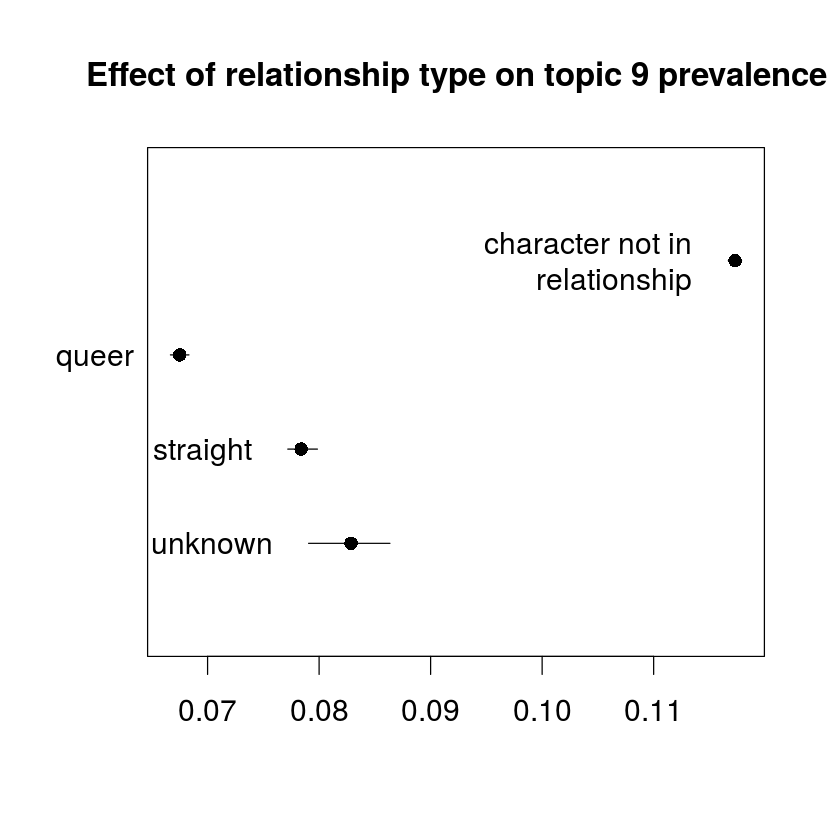

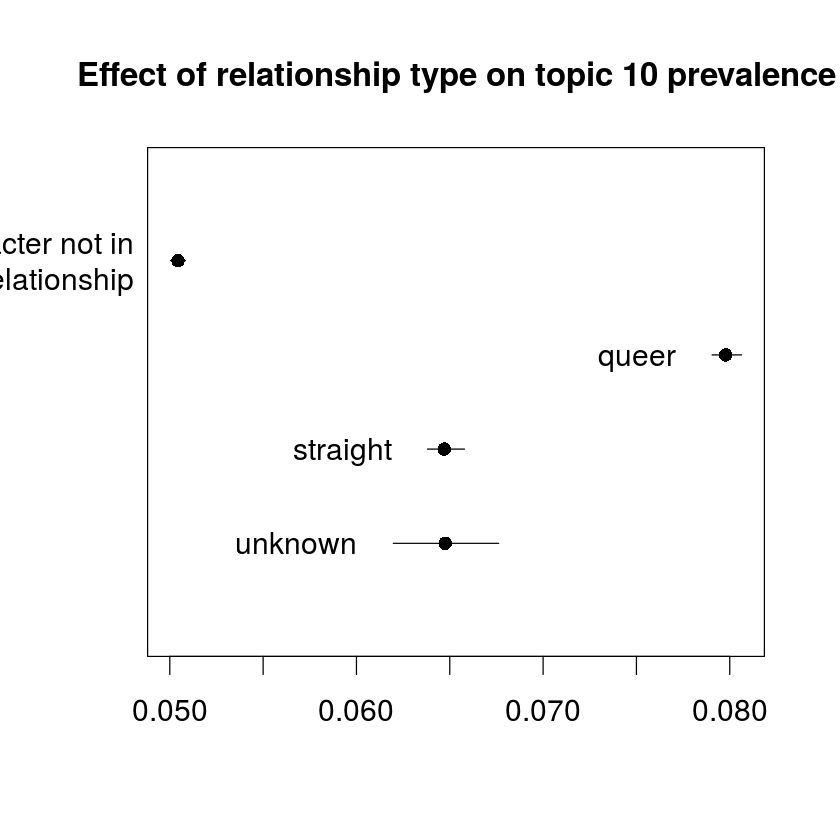

In [13]:
# Over relationship type

op <-par(cex=1.5)

for (topic_num in 1:10) {
    plot(effect, 
         covariate='character_in_relationship_type', 
    #      topics=c(4, 9),
         topics=c(topic_num),
    #      topics=1:10,
         model = model,
         method = 'pointestimate',
         main = sprintf('Effect of relationship type on topic %d prevalence', topic_num),
    #      xlim = c(-.07, .07),
    #      xlab = 'More male ... more female',
         labeltype = 'custom',
         cex.main = 1.1,
    #      cex.axis = 1.5,
    #      cex.lab = 2,
         custom.labels = c(
             'character not in relationship',
             'queer',
             'straight',
             'unknown'
             )
        )
}

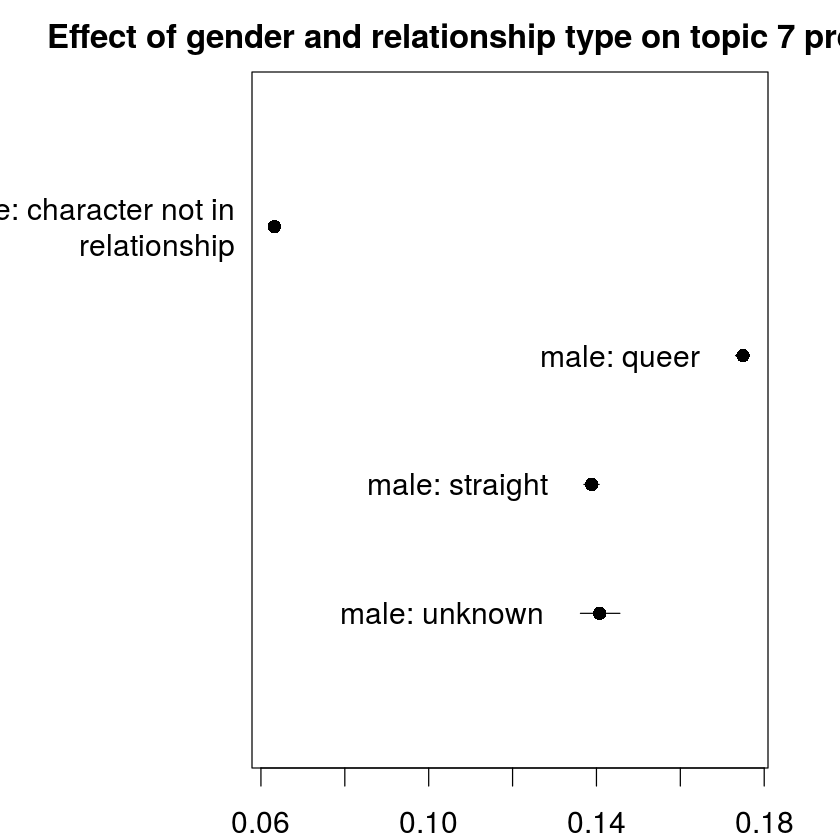

In [58]:
# Over relationship type and gender

# dev.new(width=5,height=4, unit='in')
op <-par(cex=1.5)
par(mar = c(2,7,2,2))

# topic_num <- 4
# for (topic_num in 1:10) {
# for (topic_num in c(4,6,9,10)) {
for (topic_num in c(7)) {
    plot(effect, 
         covariate='character_in_relationship_type', 
         topics=c(topic_num),
    #      topics=1:10,
         model = model,
         method = 'pointestimate',
         moderator = 'character_gender',
         moderator.value = 'male',
         main = sprintf('Effect of gender and relationship type on topic %d prevalence', topic_num),
#          xlim = c(.03, .1),
         labeltype = 'custom',
         cex.main = 1.1,
         custom.labels = c(
             'male: character not in relationship',
             'male: queer',
             'male: straight',
             'male: unknown'
             )
        )
}

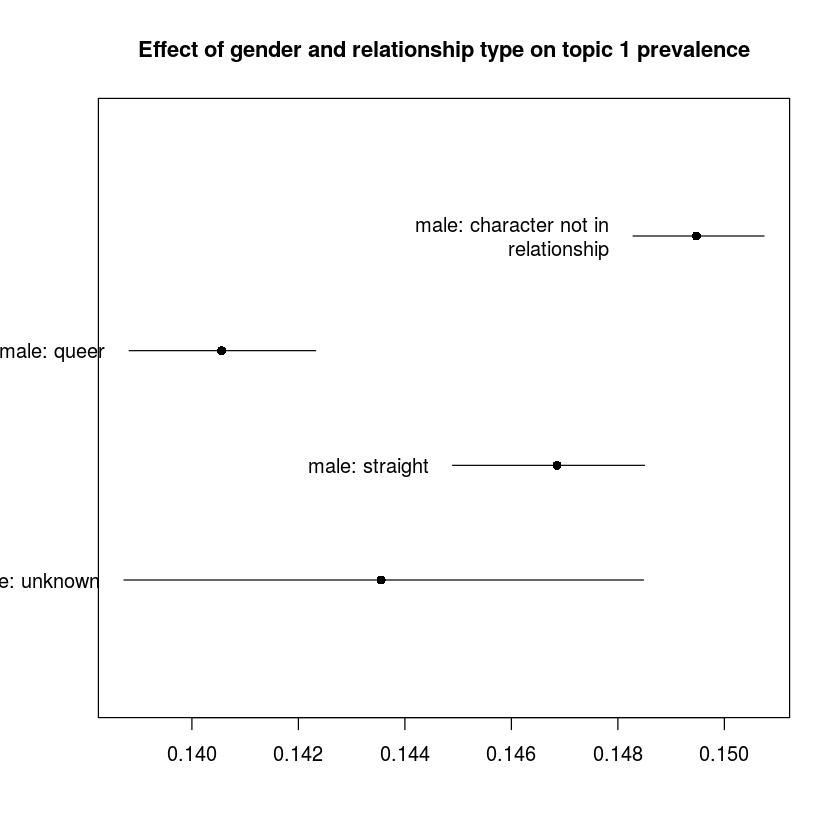

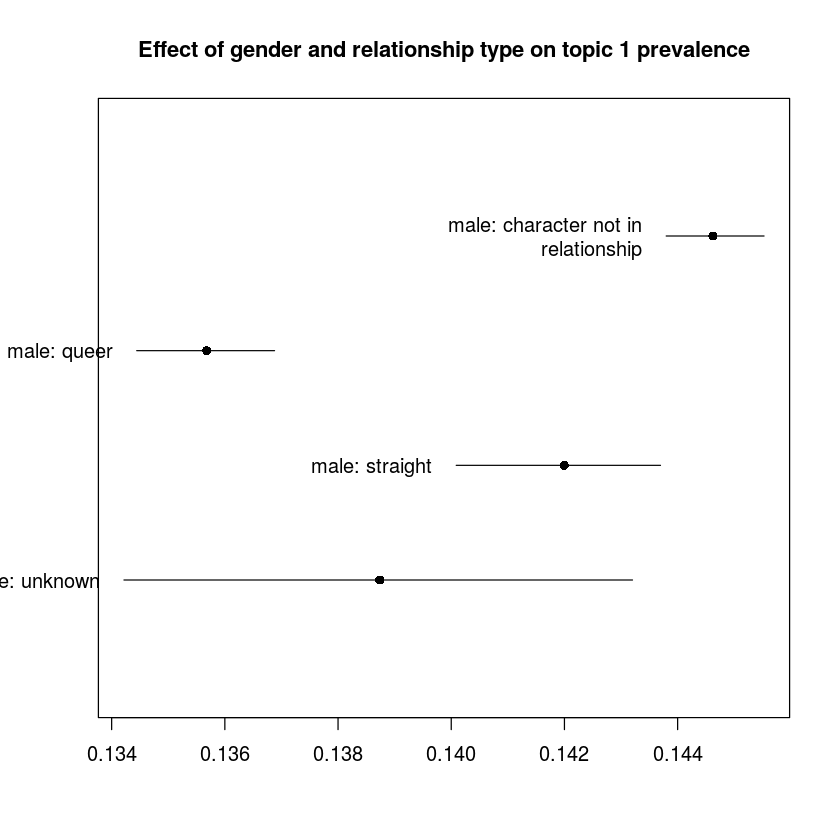

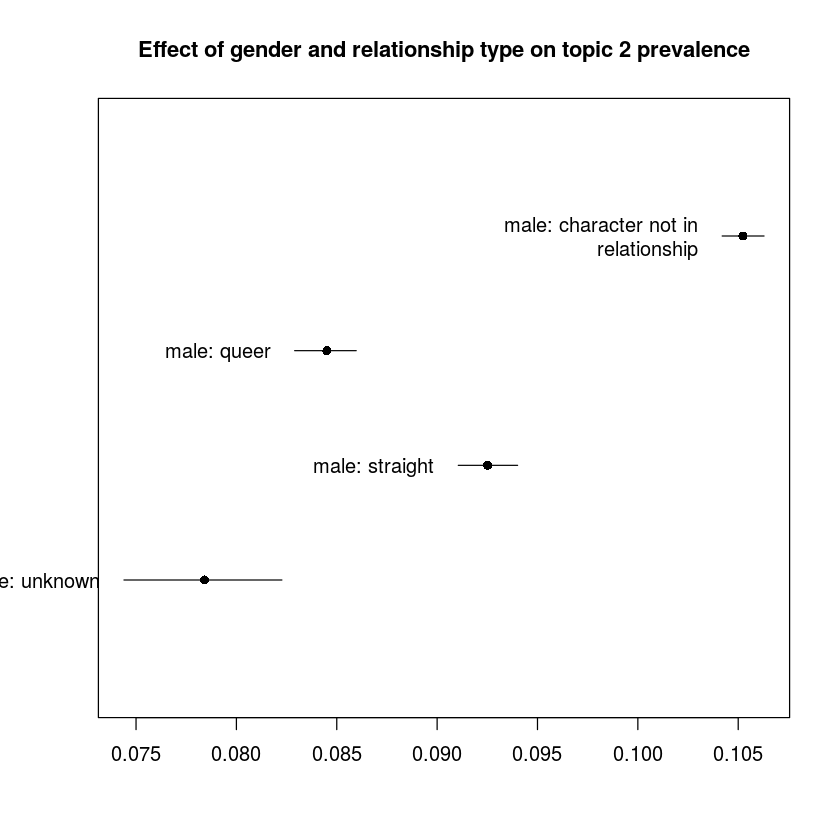

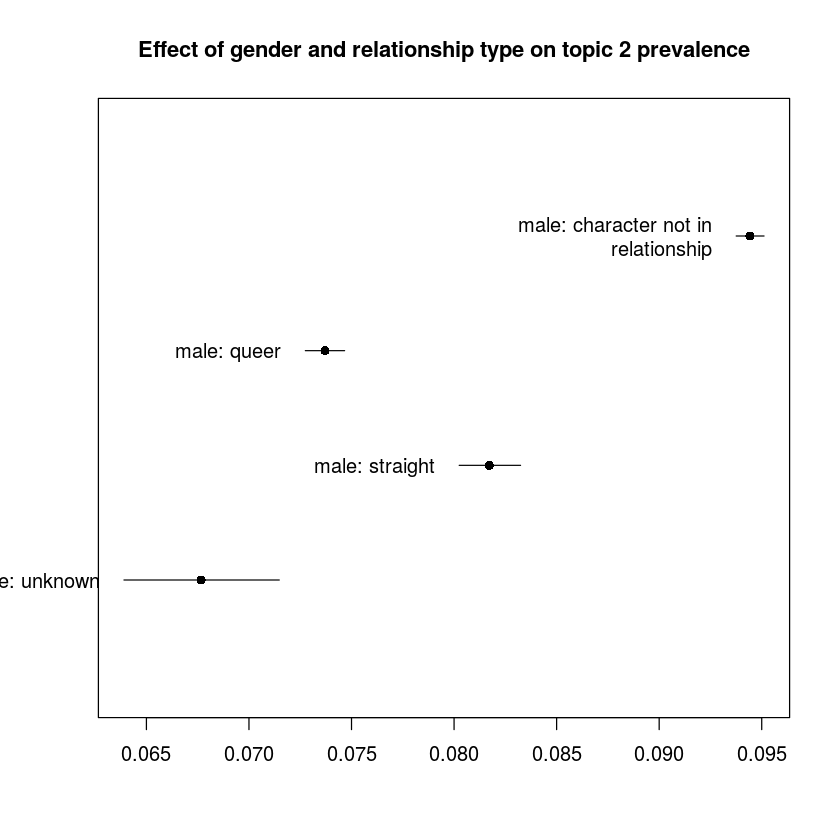

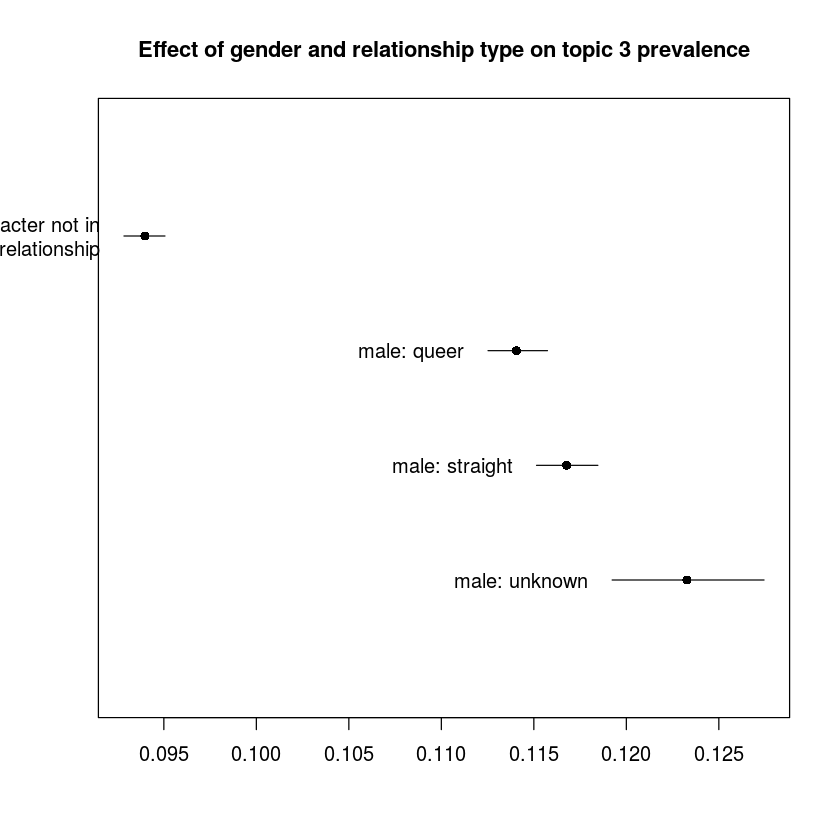

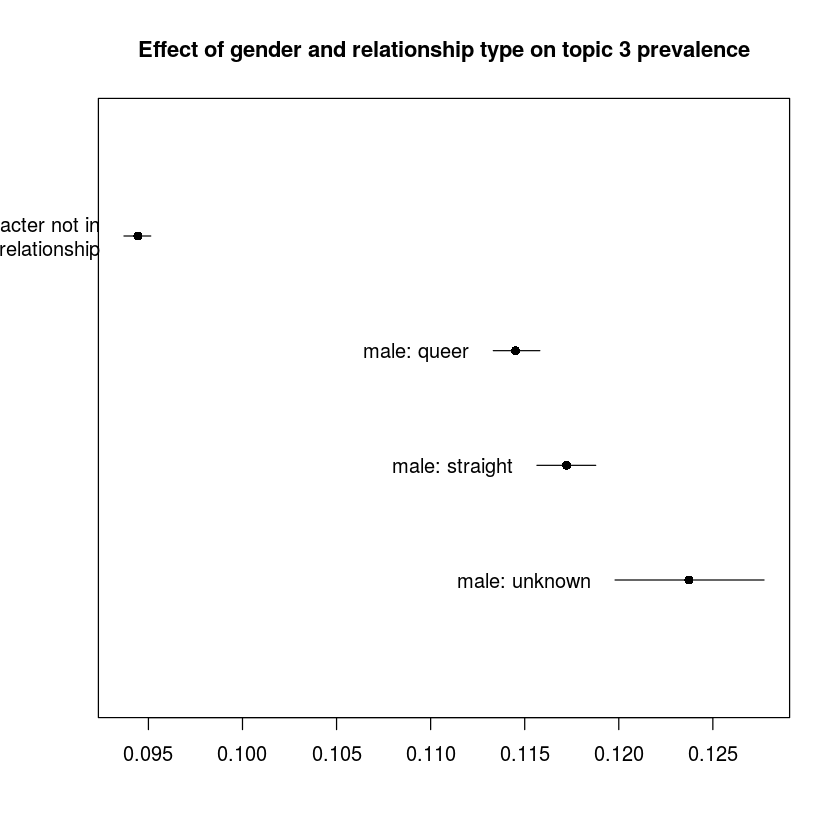

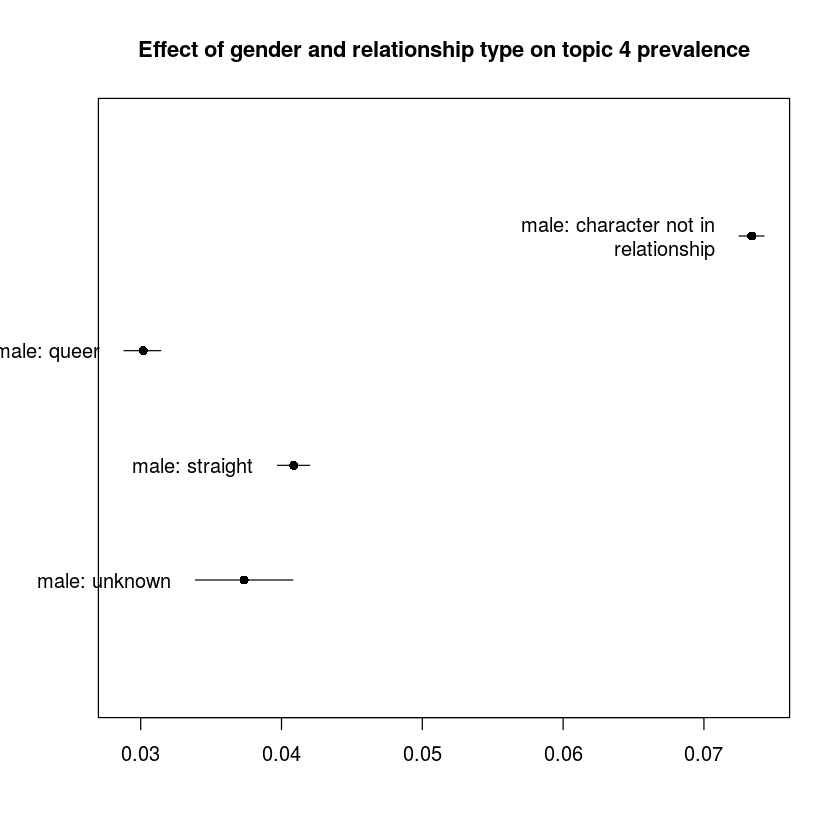

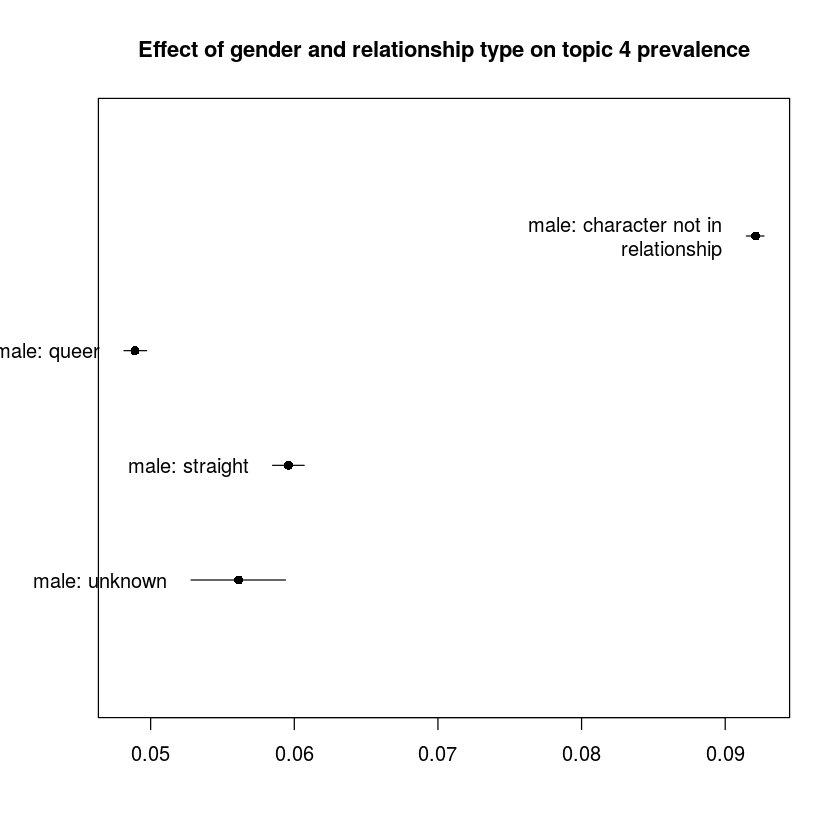

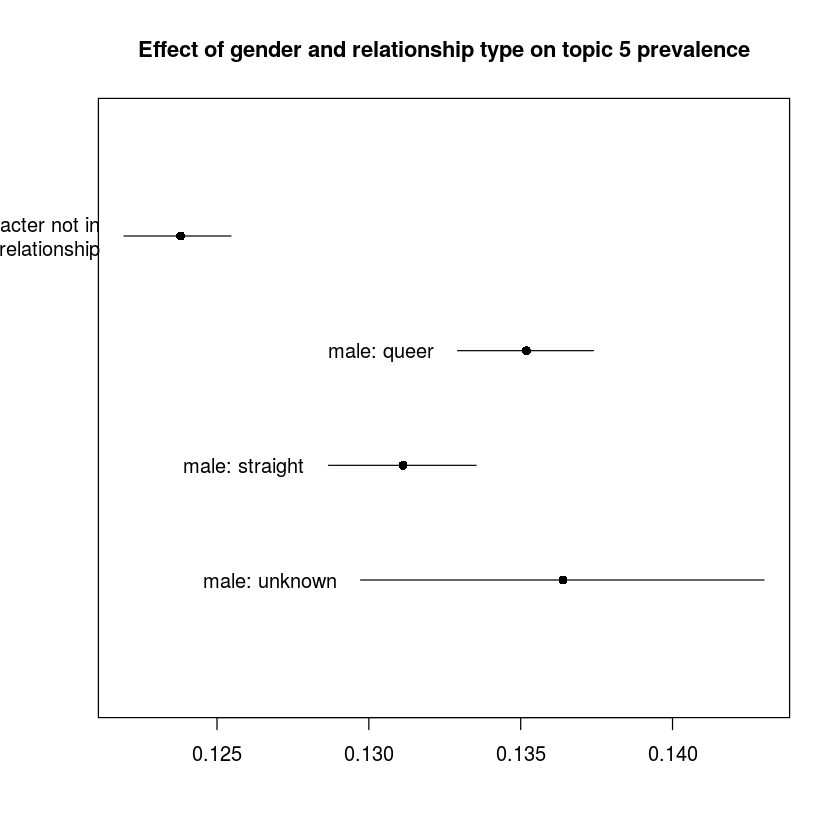

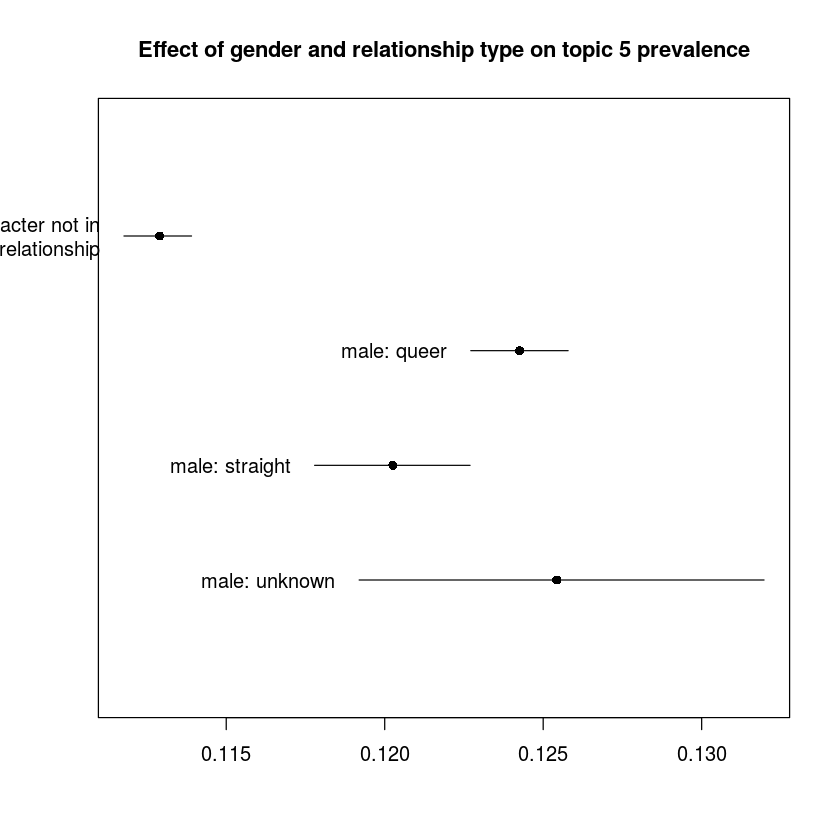

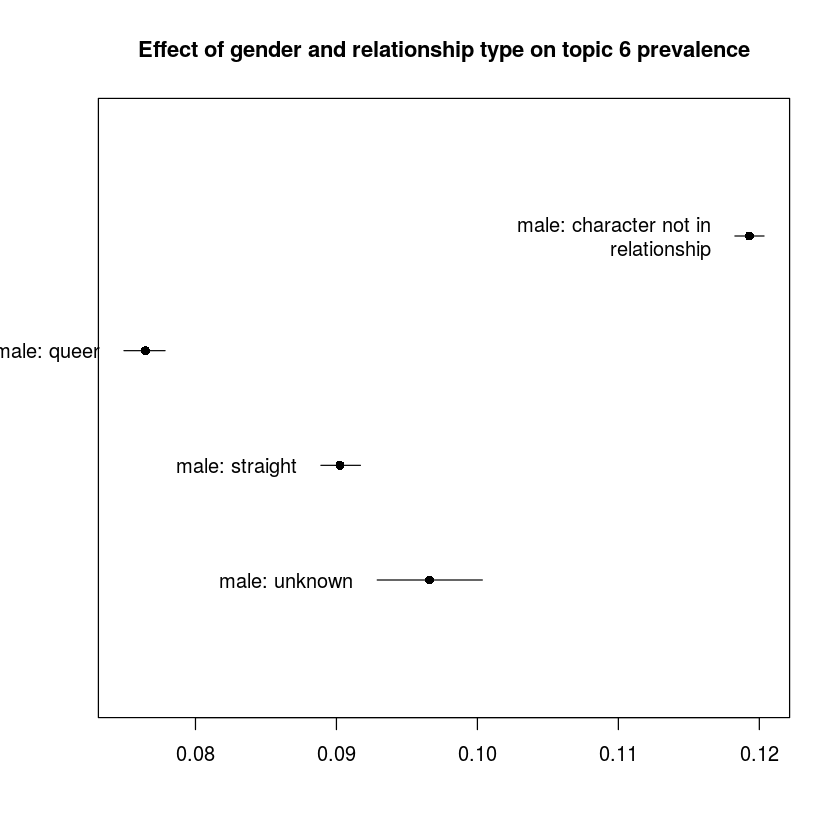

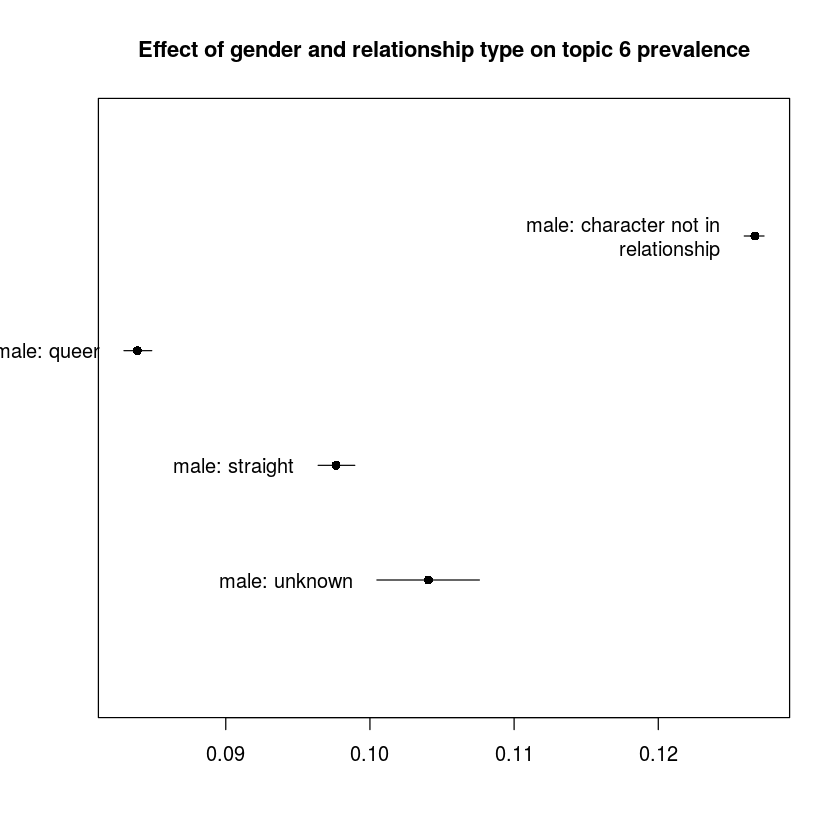

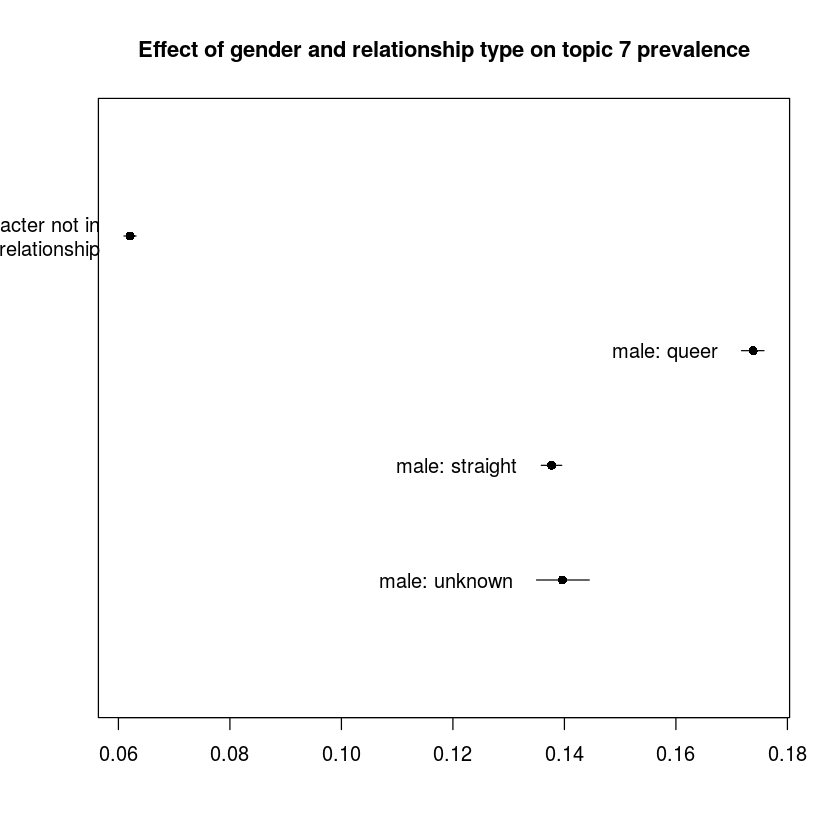

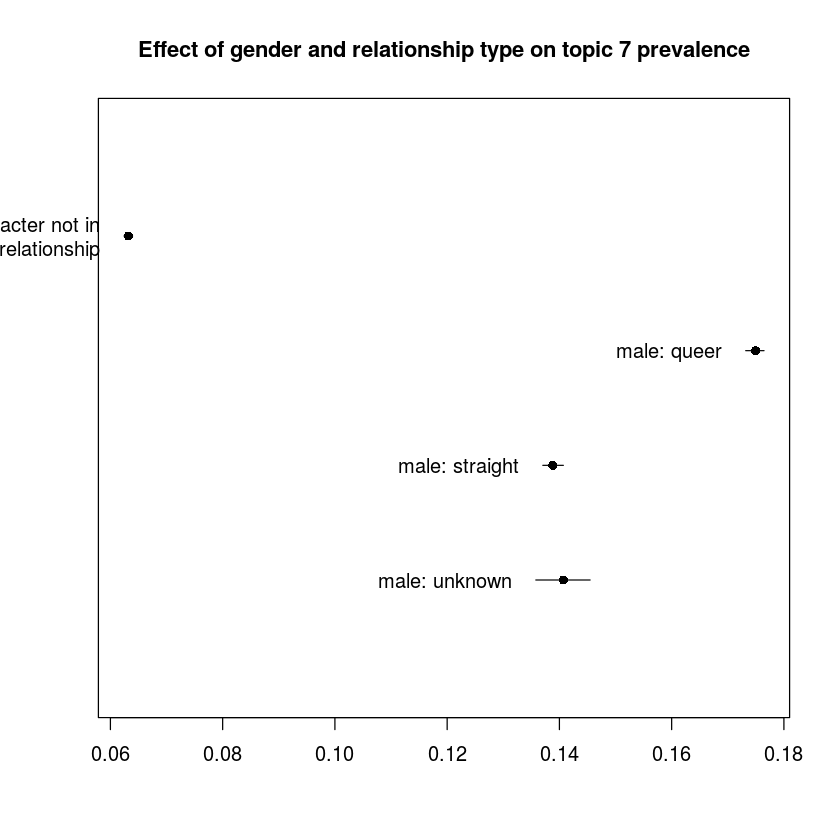

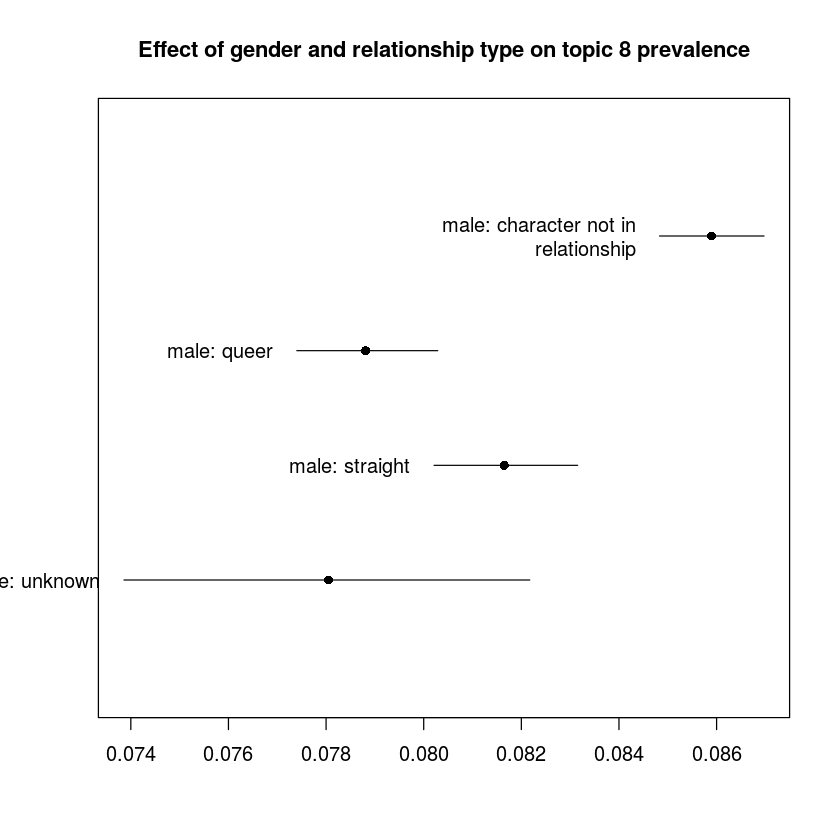

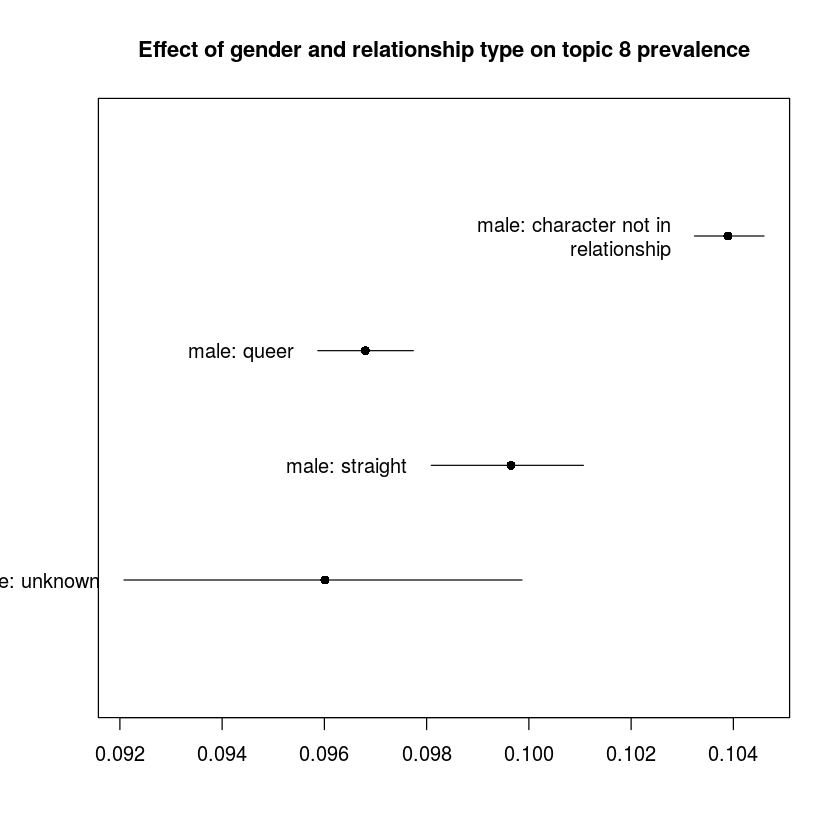

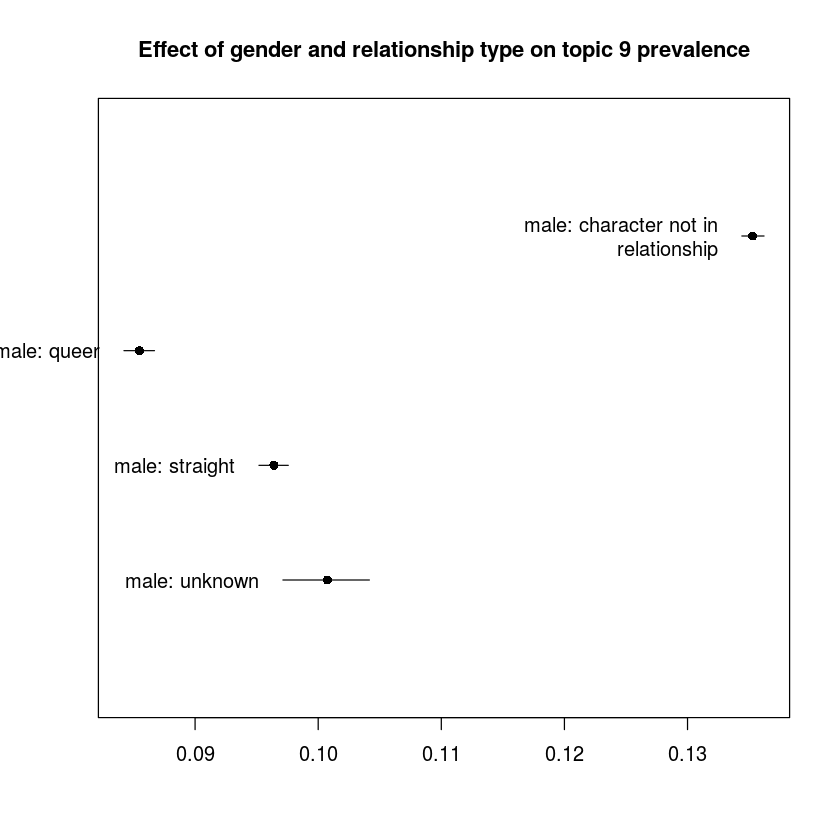

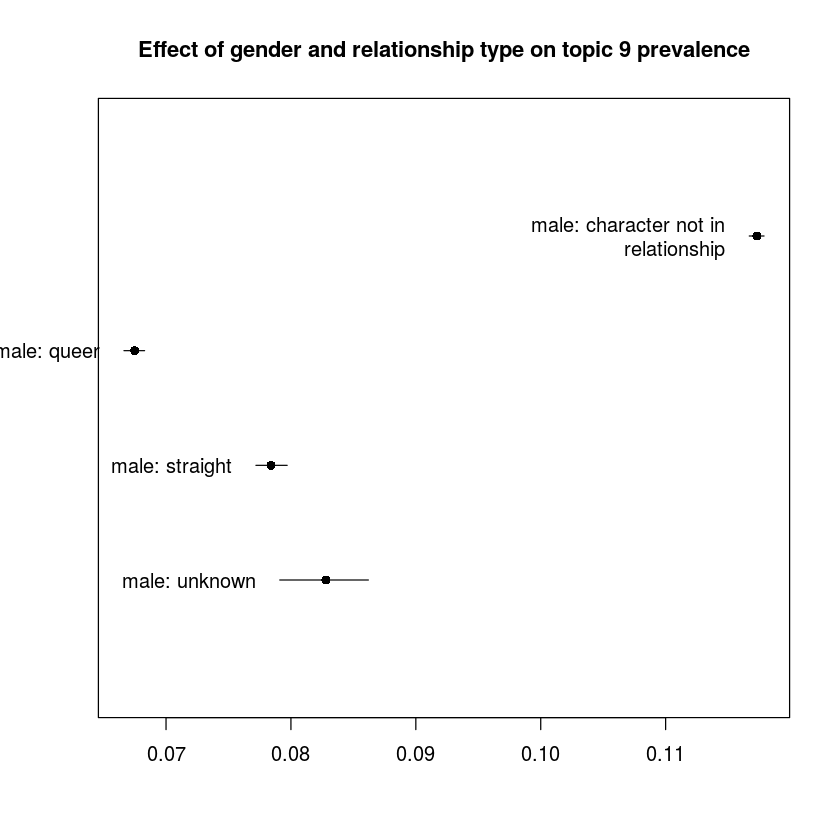

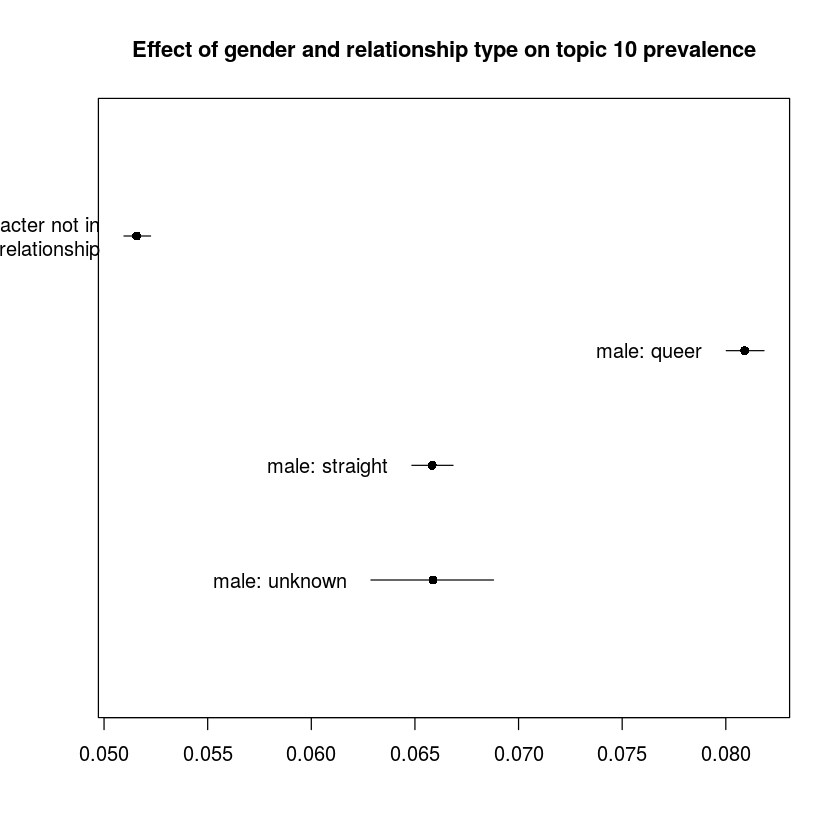

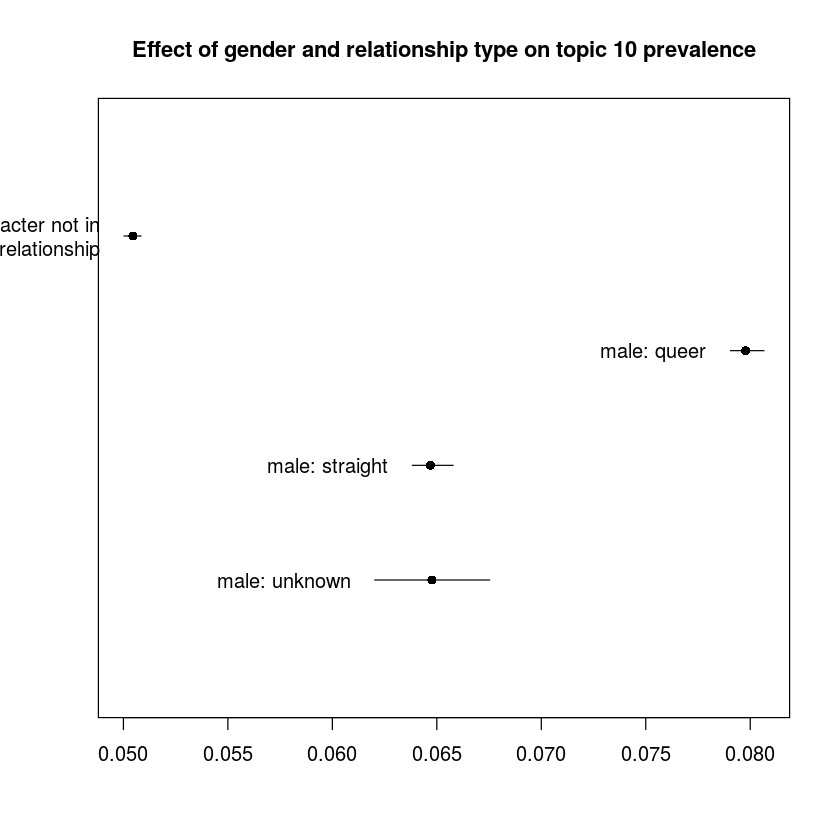

In [81]:
# Save out plotted means for Python visualization
for (topic_num in 1:10) {
    
    for (gender in c('female', 'male')) {
        
        plotted <- plot(effect, 
             covariate='character_in_relationship_type', 
             topics=c(topic_num),
             model = model,
             method = 'pointestimate',
             moderator = 'character_gender',
             moderator.value = gender,
             main = sprintf('Effect of gender and relationship type on topic %d prevalence', topic_num),
             labeltype = 'custom',
             cex.main = 1.1,
             custom.labels = c(
                 sprintf('%s: character not in relationship', gender),
                 sprintf('%s: queer', gender),
                 sprintf('%s: straight', gender),
                 sprintf('%s: unknown', gender)
                 )
            )
        
        path <- sprintf('/data/fanfiction_gender_roles/tmp/topic_means/topic%s_%s_rel_type_means.txt', topic_num, gender)
        fileConn <- file(path)
        writeLines(c(gender, "not in relationsip\tqueer\tstraight\tunknown", as.character(plotted$means[[1]])), fileConn)
        close(fileConn)
    }
}

In [79]:
class(plotted$means[1])
as.character(plotted$means[[1]])

[1] "list"

[1] "0.0921147754833627" "0.0489138406409513" "0.0596028813639068"
[4] "0.056153278547068"

In [80]:
# Save out plotted means for Python visualization
for (topic_num in 1:10) {
    path <- sprintf('/data/fanfiction_gender_roles/tmp/topic_means/topic4_male_rel_type_means.txt')
    fileConn <- file(path)
    writeLines(c("male", "not in relationsip\tqueer\tstraight\tunknown", as.character(plotted$means[[1]])), fileConn)
    close(fileConn)
}

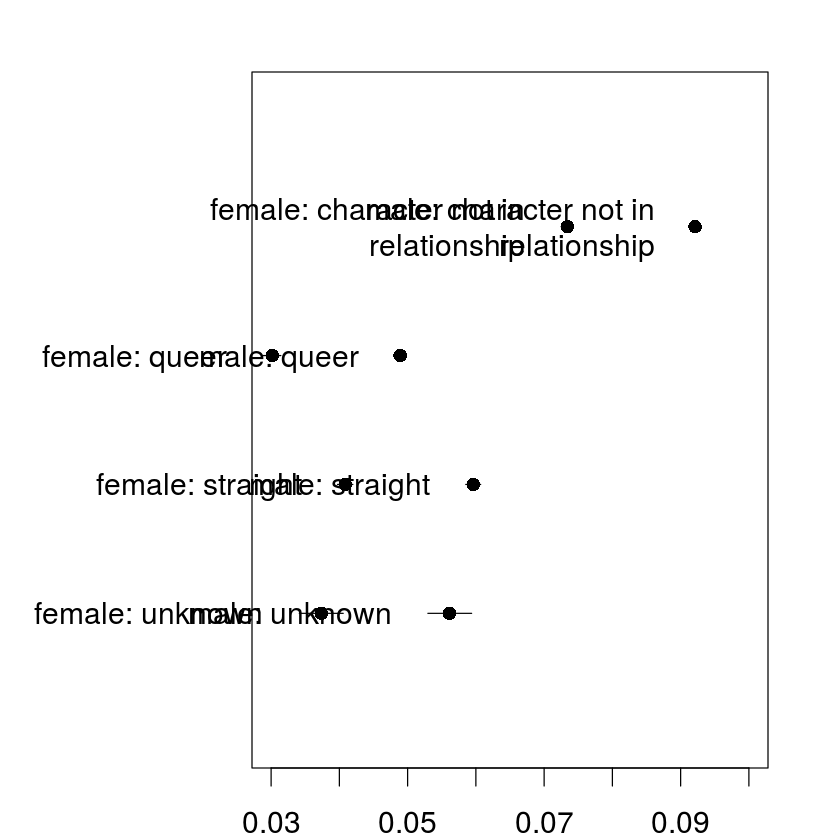

In [45]:
# Over relationship type and gender

op <-par(cex=1.5)
par(mar = c(2,7,2,2))

topic_num <- 4
# for (topic_num in 1:10) {
    plot(effect, 
         covariate='character_in_relationship_type', 
         topics=c(topic_num),
    #      topics=1:10,
         model = model,
         method = 'pointestimate',
         moderator = 'character_gender',
         moderator.value = 'male',
#          main = sprintf('Effect of relationship type on topic %d prevalence', topic_num),
         xlim = c(.03, .1),
         labeltype = 'custom',
         cex.main = 1.1,
         custom.labels = c(
             'male: character not in relationship',
             'male: queer',
             'male: straight',
             'male: unknown'
             )
        )

    plot(effect, 
         covariate='character_in_relationship_type', 
         topics=c(topic_num),
    #      topics=1:10,
         model = model,
         method = 'pointestimate',
         moderator = 'character_gender',
         moderator.value = 'female',
#          main = sprintf('Effect of relationship type on topic %d prevalence', topic_num),
    #      xlim = c(-.07, .07),
         labeltype = 'custom',
         cex.main = 1.1,
         add = TRUE,
         custom.labels = c(
             'female: character not in relationship',
             'female: queer',
             'female: straight',
             'female: unknown'
             )
        )
# }

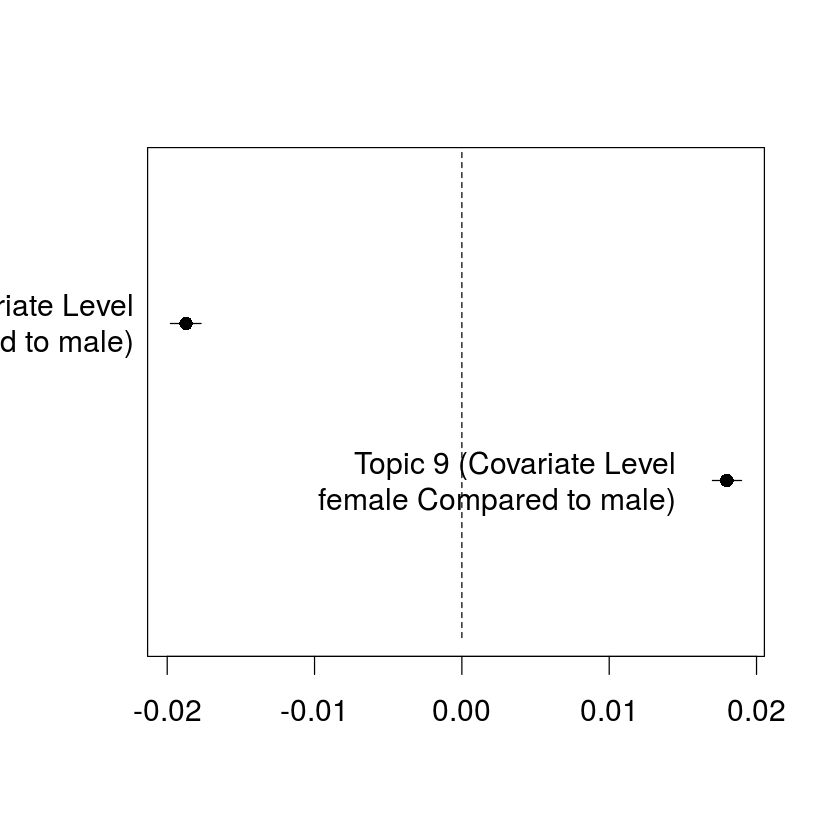

In [34]:
# Over relationship type and gender (don't think this works for some reason)

op <-par(cex=1.5)

# topic_num <- 4
# for (topic_num in 1:10) {
    plot(effect, 
         covariate='character_gender', 
#          topics=c(topic_num),
         topics=c(4, 9),
    #      topics=1:10,
         model = model,
         method = 'difference',
         cov.value1 = 'female',
         cov.value2 = 'male',
#          moderator = 'character_in_relationship_type',
#          moderator.value = 'unknown',
#          main = sprintf('Effect of relationship type on topic %d prevalence', topic_num),
    #      xlim = c(-.07, .07),
#          labeltype = 'custom',
         cex.main = 1.0,
#          custom.labels = c(
#              'male: character not in relationship',
#              'male: queer',
#              'male: straight',
#              'male: unknown'
#              )
        )
# }

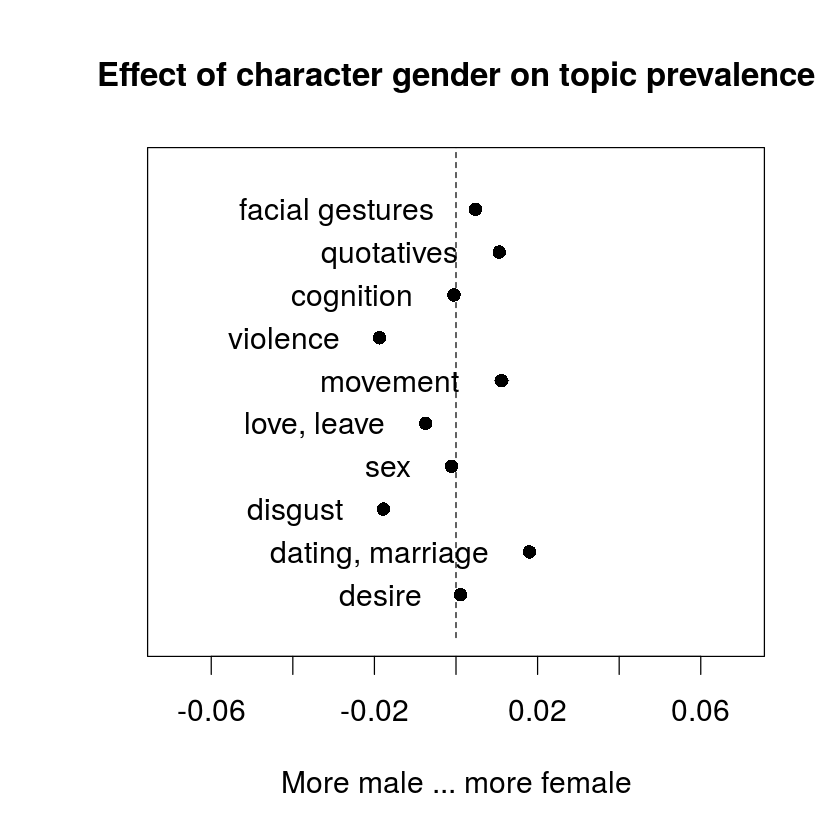

In [5]:
# Gender plot from including gender and relationship type

op <-par(cex=1.5)

plot(effect, 
     covariate='character_gender', 
#      topics=c(4, 9),
     topics=1:10,
     model = model,
     method = 'difference',
     cov.value1 = 'female',
     cov.value2 = 'male',
     main = 'Effect of character gender on topic prevalence',
     xlim = c(-.07, .07),
     xlab = 'More male ... more female',
     labeltype = 'custom',
     cex.main = 1.1,
     custom.labels = c(
         'facial gestures',
         'quotatives',
         'cognition',
         'violence',
         'movement',
         'love, leave',
         'sex',
         'disgust',
         'dating, marriage',
         'desire'
         )
    )

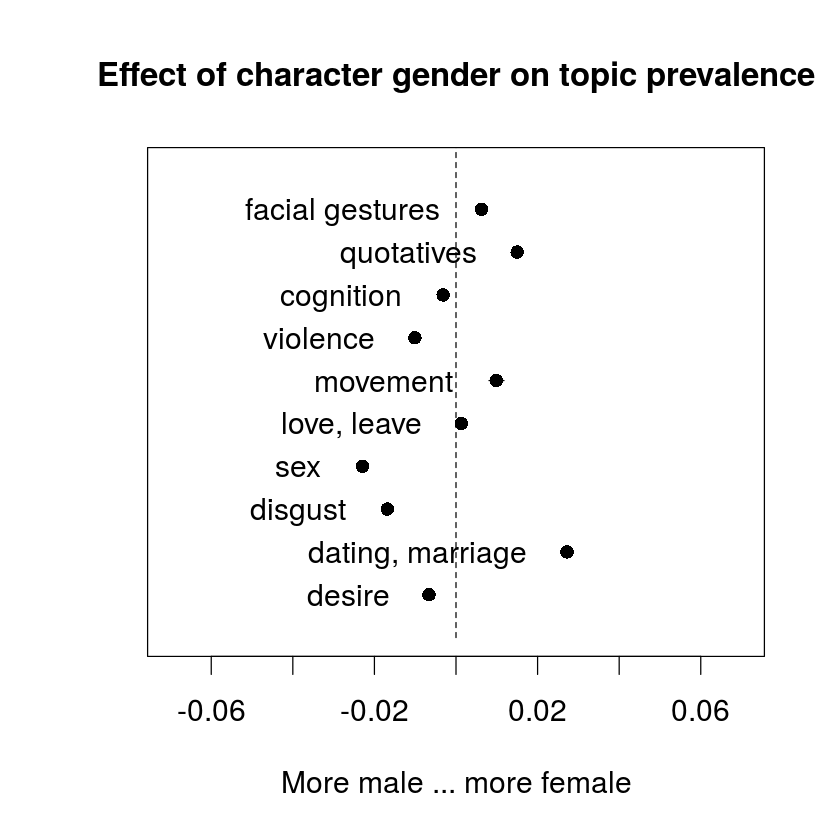

In [75]:
# Results from just gender

op <-par(cex=1.5)

plot(effect, 
     covariate='character_gender', 
#      topics=c(4, 9),
     topics=1:10,
     model = model,
     method = 'difference',
     cov.value1 = 'female',
     cov.value2 = 'male',
     main = 'Effect of character gender on topic prevalence',
     xlim = c(-.07, .07),
     xlab = 'More male ... more female',
     labeltype = 'custom',
     cex.main = 1.1,
#      cex.axis = 1.5,
#      cex.lab = 2,
#      custom.labels = c(
#          'Topic 1: facial gestures',
#          'Topic 2: quotatives',
#          'Topic 3: cognition',
#          'Topic 4: violence',
#          'Topic 5: movement',
#          'Topic 6: love, leave',
#          'Topic 7: sex',
#          'Topic 8: disgust',
#          'Topic 9: dating, marriage',
#          'Topic 10: desire'
#          )
     custom.labels = c(
         'facial gestures',
         'quotatives',
         'cognition',
         'violence',
         'movement',
         'love, leave',
         'sex',
         'disgust',
         'dating, marriage',
         'desire'
         )
    )

## Top characters per topic

In [76]:
# Get document-topic matrix
model$theta

0.05592891,0.028859269,0.07064675,0.109411811,0.06864426,0.40550054,0.05207143,0.04595421,0.07727183,0.08571099
0.21891432,0.065526865,0.09984323,0.042885473,0.03053276,0.07207600,0.23255845,0.13220796,0.05479414,0.05066080
0.15107645,0.105385697,0.12238165,0.022652115,0.01941190,0.05182418,0.28035357,0.09827396,0.11938087,0.02925961
0.13108910,0.055910012,0.03573643,0.018884484,0.06273294,0.05048390,0.48583710,0.04929775,0.06055325,0.04947504
0.31556127,0.250639832,0.04691816,0.035667603,0.04405667,0.07029278,0.06496490,0.05449545,0.08892826,0.02847508
0.23556407,0.449810259,0.04941201,0.019026051,0.02185532,0.03692657,0.04873709,0.04027280,0.06801513,0.03038070
0.14276099,0.094324068,0.08457678,0.066778239,0.09213381,0.11415697,0.05851970,0.16637551,0.12376251,0.05661143
0.04125457,0.250916210,0.23868391,0.043753821,0.09617054,0.02862711,0.09684038,0.03340689,0.06999206,0.10035451
0.12609853,0.411074089,0.03128138,0.035052404,0.04525593,0.03227730,0.02164144,0.03832196,0.17731797,0.08167900
0.17321918,0.564242534,0.01503722,0.009802543,0.04718997,0.02383460,0.04103215,0.02783105,0.08412949,0.01368127
0.07147409,0.634667146,0.02635589,0.069588107,0.02165172,0.03913180,0.02315339,0.03024904,0.04945899,0.03426984


In [77]:
class(model$theta)

[1] "matrix"

In [ ]:
# Construct a vector of topic proportions per character

In [80]:
class(out$meta$character_canonical)

[1] "factor"

In [81]:
out$meta

fic_id   character_original character_canonical character_gender
1       5888698 Remus              Remus               male            
3         10199 Draco              Draco               male            
4       5355224 Hermione           Hermione            female          
5       5355224 Draco              Draco               male            
6       5355224 Ginny              Ginny               female          
7       5355224 Luna               Luna                female          
8       5355224 Salazar            Salazar             male[5]         
9      10838292 Remus              Remus               male            
10     10838292 Marlene            Marlene             male[5]         
11     10838292 Sirius             Sirius              male            
12     10838292 James              James Potter I      male            
13     15522078 Voldemort          Voldemort           male            
14     15522078 Patil              Patil               male            
15     15522078 Hermione           Hermione            female          
16     15522078 Harry              Harry               male            
17     15522078 Draco              Draco               male            
18     15522078 Blaise             Blaise              male            
19     15522078 Zabini             Zabini              female          
20     15522078 Dean               Dean                male            
21     15522078 Dumbledore         Dumbledore          male            
22     15522078 Snape              Snape               male            
23     15522078 Severus            Severus             male            
24     15522078 Lord               Voldemort           male            
25     15522078 Dobby              Dobby               male            
26     15522078 Lily               Lily J. Potter      female          
27      9525716 Michael            Michael             male            
28      9525716 Terry              Terry               female          
29      9525716 Anthony            Anthony             female          
30      9525716 Ariana             Ariana              female          
31      9525716 Cho                Cho                 female          
⋮      ⋮        ⋮                  ⋮                   ⋮               
279134 15376641 Dudley             Dudley              male            
279135 15376641 Harry              Harry               male            
279136 15376641 Petunia            Petunia             female          
279137 10786131 Severus            Severus             male            
279138 10786131 Dumbledore         Dumbledore          male            
279139 10786131 Voldemort          Voldemort           male            
279140 10786131 Lily               Lily J. Potter      female          
279141 14829977 Severus            Severus             male            
279142 14829977 Minerva            Minerva             female          
279143 14829977 Granger            Granger             male            
279144 14829977 Regulus            Regulus Black I     male[1]         
279146 14829977 Hagrid             Hagrid              male            
279147 14829977 Kingsley           Kingsley            male[5]         
279148 14829977 Padfoot            Padfoot             male            
279149 14829977 James              James Potter I      male            
279150  7881532 Lupin              Lupin               male            
279151  7881532 Remus              Remus               male            
279152 10076291 Harry              Harry               male            
279154 10076291 Ron                Ron                 male            
279156 10076291 Crabbe             Crabbe              male            
279157  9182275 Graves             Graves              male            
279158  8703775 Newt               Newton Scamander    male[2]         
279159  8703775 Percy              Percy               male            
279160  8703775 Queenie            Queenie     

In [86]:
char <- 'Draco'
is_char <- out$meta$character_canonical == 'Draco'
class(is_char)

[1] "logical"

In [114]:
char_rows <- model$theta[is_char,]
char_rows

0.21891432,0.06552687,0.09984323,0.04288547,0.03053276,0.07207600,0.23255845,0.13220796,0.05479414,0.05066080
0.13108910,0.05591001,0.03573643,0.01888448,0.06273294,0.05048390,0.48583710,0.04929775,0.06055325,0.04947504
0.38209706,0.02251002,0.08955746,0.04598936,0.02946234,0.10401991,0.17972795,0.07940940,0.03529247,0.03193402
0.22598241,0.08236822,0.06531559,0.02977029,0.03911505,0.06110469,0.25688589,0.07863686,0.12022828,0.04059272
0.04589017,0.03208536,0.08832597,0.08989693,0.14815235,0.18823266,0.05387570,0.03629959,0.10598898,0.21125230
0.04237861,0.02001515,0.19175548,0.04895332,0.05880232,0.03717538,0.15908922,0.03061029,0.11804949,0.29317074
0.19805678,0.15853962,0.11145005,0.02857561,0.02116262,0.05116565,0.20946603,0.13689667,0.03678794,0.04789902
0.09238731,0.03324785,0.07672806,0.12777576,0.11324958,0.16681777,0.06448060,0.08180618,0.10052724,0.14297966
0.18982482,0.13322421,0.05827821,0.04353386,0.08218736,0.09589910,0.02952664,0.18277120,0.08910062,0.09565398
0.14192267,0.07480338,0.09695187,0.07073031,0.08687662,0.12312850,0.08313750,0.08973582,0.16761800,0.06509533
0.27632798,0.05453994,0.05081917,0.02572217,0.03283068,0.08232087,0.20810947,0.09759047,0.13795545,0.03378382


In [115]:
char_topic_proportion <- colMeans(char_rows)
char_topic_proportion

[1] 0.15019233 0.07452576 0.11192589 0.05624266 0.09945621 0.10022627
 [7] 0.15260058 0.10406985 0.08417557 0.06658488

In [109]:
characters <- as.character(unique(out$meta$character_canonical))
characters

[1] "Remus"                "Draco"                "Hermione"            
  [4] "Ginny"                "Luna"                 "Salazar"             
  [7] "Marlene"              "Sirius"               "James Potter I"      
 [10] "Voldemort"            "Patil"                "Harry"               
 [13] "Blaise"               "Zabini"               "Dean"                
 [16] "Dumbledore"           "Snape"                "Severus"             
 [19] "Dobby"                "Lily J. Potter"       "Michael"             
 [22] "Terry"                "Anthony"              "Ariana"              
 [25] "Cho"                  "Padma"                "Seamus"              
 [28] "Dudley"               "Draco Malfoy"         "Tonks"               
 [31] "Fleur"                "Rose Granger-Weasley" "Bill"                
 [34] "Teddy Lupin"          "Kingsley"             "Ron"                 
 [37] "Harry Potter"         "Peter"                "Dolohov"             
 [40] "Oliver"               "Pansy"                "Tom Riddle"          
 [43] "Neville"              "Parvati"              "Greyback"            
 [46] "Hagrid"               "Rolf"                 "Mother"              
 [49] "Lucius"               "Rodolphus"            "Graves"              
 [52] "George"               "Fred"                 "McGonagall"          
 [55] "Albus Dumbledore"     "Charlie"              "Nagini"              
 [58] "Lupin"                "Narcissa"             "Newton Scamander"    
 [61] "Percy"                "Alice"                "Minerva"             
 [64] "Arthur"               "Scorpius"             "Goyle"               
 [67] "Granger"              "Sirius Black"         "Regulus Black I"     
 [70] "Padfoot"              "Bellatrix"            "Susan"               
 [73] "Molly"                "Cedric"               "Fudge"               
 [76] "Amycus"               "Viktor"               "Vance"               
 [79] "Shacklebolt"          "Moody"                "Ronald"              
 [82] "Robards"              "Fenrir"               "Peeves"              
 [85] "Petunia"              "Marge"                "Vernon"              
 [88] "Argus"                "Mary"                 "Astoria"             
 [91] "Lee"                  "Louis"                "Cygnus"              
 [94] "Slughorn"             "Queenie"              "Tina"                
 [97] "Nott"                 "Crabbe"               "Rabastan"            
[100] "Alecto"               "Justin"               "Grindelwald"         
[103] "Gregory"              "Dorcas"               "Aberforth"           
[106] "Druella"              "John"                 "Andromeda"           
[109] "Igor"                 "Karkaroff"            "Ollivander"          
[112] "Victoire"             "Dawlish"              "Piers"               
[115] "Frank"                "Vincent"              "Kreacher"            
[118] "Evan"                 "Quirrell"             "Dennis"              
[121] "Skeeter"              "Montague"             "Macnair"             
[124] "Pomfrey"              "Hugo"                 "Gideon"              
[127] "Dolores"              "Rowena"               "Lestrange"           
[130] "Rosmerta"             "Fabian"               "Theodore"            
[133] "Alicia"               "Angelina"             "Katie"               
[136] "Walburga"             "Marietta"             "Charlus"             
[139] "Pince"                "Diary"                "Flitwick"            
[142] "Pomona"               "Audrey"               "Abraxas"             
[145] "Zacharias"            "Augustus"             "Rowle"               
[148] "Lorcan"               "Lysander"             "Scamander"           
[151] "Hope"                 "III"                  "Lucy"                
[154] "Roxanne"              "Euphemia"             "Rita"                
[157] "Filch"                "Tobias"               "Eileen"              
[160] "Horace"             

In [110]:
length(unique(out$meta$character_canonical))

[1] 264

In [145]:
char_topic_distro <- function(name) {
    is_char <- out$meta$character_canonical == name
    char_rows <- model$theta[is_char,]
    char_topic_proportion <- colMeans(char_rows)
    return(char_topic_proportion)
}

In [120]:
test_list <- c('Draco', 'James Potter I')
test_list

[1] "Draco"          "James Potter I"

In [156]:
test_char_topic_distros <- lapply(test_list, char_topic_distro)
test_char_topic_distros

[[1]]
 [1] 0.15019233 0.07452576 0.11192589 0.05624266 0.09945621 0.10022627
 [7] 0.15260058 0.10406985 0.08417557 0.06658488

[[2]]
 [1] 0.16412862 0.09052456 0.09624287 0.06539509 0.11342394 0.10792800
 [7] 0.10200108 0.09493438 0.10594764 0.05947380

In [155]:
t(do.call('cbind', test_char_topic_distros))

0.1501923,0.07452576,0.11192589,0.05624266,0.09945621,0.1002263,0.1526006,0.10406985,0.08417557,0.06658488
0.1641286,0.09052456,0.09624287,0.06539509,0.11342394,0.1079280,0.1020011,0.09493438,0.10594764,0.05947380


In [113]:
class(characters)

[1] "character"

In [123]:
characters[0:100]

[1] "Remus"                "Draco"                "Hermione"            
  [4] "Ginny"                "Luna"                 "Salazar"             
  [7] "Marlene"              "Sirius"               "James Potter I"      
 [10] "Voldemort"            "Patil"                "Harry"               
 [13] "Blaise"               "Zabini"               "Dean"                
 [16] "Dumbledore"           "Snape"                "Severus"             
 [19] "Dobby"                "Lily J. Potter"       "Michael"             
 [22] "Terry"                "Anthony"              "Ariana"              
 [25] "Cho"                  "Padma"                "Seamus"              
 [28] "Dudley"               "Draco Malfoy"         "Tonks"               
 [31] "Fleur"                "Rose Granger-Weasley" "Bill"                
 [34] "Teddy Lupin"          "Kingsley"             "Ron"                 
 [37] "Harry Potter"         "Peter"                "Dolohov"             
 [40] "Oliver"               "Pansy"                "Tom Riddle"          
 [43] "Neville"              "Parvati"              "Greyback"            
 [46] "Hagrid"               "Rolf"                 "Mother"              
 [49] "Lucius"               "Rodolphus"            "Graves"              
 [52] "George"               "Fred"                 "McGonagall"          
 [55] "Albus Dumbledore"     "Charlie"              "Nagini"              
 [58] "Lupin"                "Narcissa"             "Newton Scamander"    
 [61] "Percy"                "Alice"                "Minerva"             
 [64] "Arthur"               "Scorpius"             "Goyle"               
 [67] "Granger"              "Sirius Black"         "Regulus Black I"     
 [70] "Padfoot"              "Bellatrix"            "Susan"               
 [73] "Molly"                "Cedric"               "Fudge"               
 [76] "Amycus"               "Viktor"               "Vance"               
 [79] "Shacklebolt"          "Moody"                "Ronald"              
 [82] "Robards"              "Fenrir"               "Peeves"              
 [85] "Petunia"              "Marge"                "Vernon"              
 [88] "Argus"                "Mary"                 "Astoria"             
 [91] "Lee"                  "Louis"                "Cygnus"              
 [94] "Slughorn"             "Queenie"              "Tina"                
 [97] "Nott"                 "Crabbe"               "Rabastan"            
[100] "Alecto"

In [157]:
# char_topic_distros <- lapply(characters, char_topic_distro)
char_topic_distros <- t(do.call('cbind', lapply(characters[0:176], char_topic_distro)))
char_topic_distros

0.1500534,0.08372488,0.11423904,0.05968618,0.12160122,0.1007313,0.12931766,0.08751457,0.08789994,0.06523175
0.1501923,0.07452576,0.11192589,0.05624266,0.09945621,0.1002263,0.15260058,0.10406985,0.08417557,0.06658488
0.1648270,0.10390666,0.10723037,0.05431719,0.10239316,0.1051810,0.10040193,0.08290447,0.12398780,0.05485041
0.1573221,0.09771930,0.10013117,0.05926260,0.11142542,0.1168667,0.08994384,0.07417521,0.13525121,0.05790248
0.1771786,0.11216262,0.09303345,0.05300126,0.11791381,0.1073481,0.08318571,0.07229633,0.13154094,0.05233926
0.1368225,0.08392194,0.09315039,0.07072116,0.12714930,0.1233527,0.07409284,0.10906807,0.12214885,0.05957224
0.1585707,0.10746404,0.08196297,0.06716172,0.13189344,0.1125805,0.05822458,0.08940300,0.13939476,0.05334427
0.1763028,0.08948112,0.09030604,0.06072943,0.11292694,0.1063240,0.11869493,0.09842528,0.09434381,0.05246570
0.1641286,0.09052456,0.09624287,0.06539509,0.11342394,0.1079280,0.10200108,0.09493438,0.10594764,0.05947380
0.1195444,0.06067256,0.10523251,0.12792496,0.09245517,0.1418456,0.08868500,0.09359591,0.10327325,0.06677066
0.1537286,0.10099299,0.10278872,0.06554743,0.10780798,0.1089905,0.09649072,0.09346415,0.10684149,0.06334738


In [165]:
max_inds <- argmax(char_topic_distros, rows=FALSE)
max_inds

[1] 142  72 173 119  60  48  83  80  48  42

In [166]:
lapply(max_inds, function (ind) {characters[ind]})

[[1]]
[1] "Pomona"

[[2]]
[1] "Susan"

[[3]]
[1] "Sybill"

[[4]]
[1] "Quirrell"

[[5]]
[1] "Newton Scamander"

[[6]]
[1] "Mother"

[[7]]
[1] "Fenrir"

[[8]]
[1] "Moody"

[[9]]
[1] "Mother"

[[10]]
[1] "Tom Riddle"

In [91]:
test = matrix(1:9, nrow=3)
test

1,4,7
2,5,8
3,6,9


In [93]:
test[c(TRUE, FALSE, TRUE),]

1,4,7
3,6,9


In [98]:
means = colMeans(test)
class(means)

[1] "numeric"

In [162]:
library('ramify')


Attaching package: ‘ramify’


The following object is masked from ‘package:graphics’:

    clip




In [164]:
test

1,4,7
2,5,8
3,6,9


In [163]:
argmax(test, rows=FALSE)

[1] 3 3 3

# Estimate STM

## Input data

In [24]:
# data <- read.csv('/data/fanfiction_gender_roles/harrypotter_ao3/complete_en_1k-50k/output/character_gender_features1000.csv')
data <- read.csv('/data/fanfiction_gender_roles/harrypotter_ao3/complete_en_1k-50k/output/character_gender_features.csv')
data

fic_id   character_original character_canonical character_gender
1       5923603 Sirius             Sirius              male            
2       5888698 Remus              Remus               male            
3       5888698 Padfoot            Padfoot             male            
4         10199 Draco              Draco               male            
5       5355224 Hermione           Hermione            female          
6       5355224 Draco              Draco               male            
7       5355224 Ginny              Ginny               female          
8       5355224 Luna               Luna                female          
9       5355224 Salazar            Salazar             male[5]         
10     10838292 Remus              Remus               male            
11     10838292 Marlene            Marlene             male[5]         
12     10838292 Sirius             Sirius              male            
13     10838292 James              James Potter I      male            
14     15522078 Voldemort          Voldemort           male            
15     15522078 Patil              Patil               male            
16     15522078 Hermione           Hermione            female          
17     15522078 Harry              Harry               male            
18     15522078 Draco              Draco               male            
19     15522078 Blaise             Blaise              male            
20     15522078 Zabini             Zabini              female          
21     15522078 Dean               Dean                male            
22     15522078 Dumbledore         Dumbledore          male            
23     15522078 Snape              Snape               male            
24     15522078 Severus            Severus             male            
25     15522078 Lord               Voldemort           male            
26     15522078 Dobby              Dobby               male            
27     15522078 Lily               Lily J. Potter      female          
28      9525716 Michael            Michael             male            
29      9525716 Terry              Terry               female          
30      9525716 Anthony            Anthony             female          
⋮      ⋮        ⋮                  ⋮                   ⋮               
281014 10786131 Severus            Severus             male            
281015 10786131 Dumbledore         Dumbledore          male            
281016 10786131 Voldemort          Voldemort           male            
281017 10786131 Lily               Lily J. Potter      female          
281018 14829977 Severus            Severus             male            
281019 14829977 Minerva            Minerva             female          
281020 14829977 Granger            Granger             male            
281021 14829977 Regulus            Regulus Black I     male[1]         
281022 14829977 Voldemort          Voldemort           male            
281023 14829977 Hagrid             Hagrid              male            
281024 14829977 Kingsley           Kingsley            male[5]         
281025 14829977 Padfoot            Padfoot             male            
281026 14829977 James              James Potter I      male            
281027  7881532 Lupin              Lupin               male            
281028  7881532 Remus              Remus               male            
281029 10076291 Harry              Harry               male            
281030 10076291 Potter             Harry Potter        male            
281031 10076291 Ron                Ron                 male            
281032 10076291 Goyle              Goyle               male            
281033 10076291 Crabbe             Crabbe              male            
281034  9182275 Graves             Graves              male            
281035  8703775 Newt               Newton Scamander    male[2]         
281036  8703775 Percy              Percy               male            
281037  8703775 Queenie            Queenie     

In [5]:
library('stm')

Loading required package: NLP



In [26]:
processed <- textProcessor(data$character_features, stem=FALSE, metadata=data)
processed

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Creating Output... 


A text corpus with 266041 documents, and an 31500 word dictionary.

In [28]:
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)

Removing 10165 of 31500 terms (10165 of 6184626 tokens) due to frequency 
Removing 163 Documents with No Words 
Your corpus now has 265878 documents, 21335 terms and 6174461 tokens.

In [30]:
estimated <- stm(documents = out$documents,
                vocab = out$vocab,
                K = 10,
                max.em.its = 1,
                prevalence =~ character_gender,
                data = out$meta)

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..........
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (132 seconds). 
Completed M-Step. 
Model Terminated Before Convergence Reached 


In [31]:
saveRDS(estimated, '/data/fanfiction_gender_roles/harrypotter_ao3/tmp/stm_10topics_1it.rds')

In [70]:
saveRDS(model, '/data/fanfiction_gender_roles/harrypotter_ao3/tmp/100topics_old.rds')